In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!jt -r

<h1><center>Predition of Vertical Heights </center></h1>

In [56]:
df=pd.read_excel("data_main.xlsx")

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11299 entries, 0 to 11298
Data columns (total 38 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   fid                                     11299 non-null  int64  
 1   hexid                                   11299 non-null  object 
 2   IS_DC                                   11299 non-null  object 
 3   D_Name                                  11299 non-null  object 
 4   IS_SC                                   11299 non-null  object 
 5   x                                       11299 non-null  float64
 6   y                                       11299 non-null  float64
 7   total_POI                               11299 non-null  int64  
 8   lulc_Vegetation                         11299 non-null  int64  
 9   lulc_Barren                             11299 non-null  int64  
 10  lulc_Builtup                            11299 non-null  in

### DATA - (H09 grid)
#### Here is the First five rows of Raw Data

In [58]:
df.head()

fid            hexid      IS_DC    D_Name   IS_SC          x          y  \
0    1  893da156cbbffff  IND006086  Gurugram  IND006  77.020751  28.328302   
1    2  893da146417ffff  IND006086  Gurugram  IND006  77.097096  28.231022   
2    3  893da1ce837ffff  IND006086  Gurugram  IND006  76.905302  28.402170   
3    4  893da1cdeb7ffff  IND006086  Gurugram  IND006  76.884498  28.300328   
4    5  893da152e97ffff  IND006086  Gurugram  IND006  76.844783  28.247142   

   total_POI  lulc_Vegetation  lulc_Barren  lulc_Builtup  albedo_mean  \
0          0            86900            0         16400     0.252253   
1          0           103100            0             0     0.275292   
2          0            90500            0         13600     0.272413   
3          0            71600            0         31900     0.279683   
4          0           103500            0             0     0.276645   

   ndvi_mean  ndbi_mean  gaia_mean  ntl_mean  s1vh_mean  s1vv_mean  \
0   0.211397  -0.031467   0.420290  2.586854 -12.785812  -7.694971   
1   0.305999  -0.182916   0.000000  3.196074 -17.228567  -9.669458   
2   0.244329  -0.120760   1.822222  7.462338 -16.687158  -9.444416   
3   0.272914  -0.127417   1.731343  5.720000 -15.995422  -8.989329   
4   0.271551  -0.098947   0.000000  2.166084 -16.987003 -10.112965   

      pop_sum  poi_gurugram_v1_businessfacility  poi_gurugram_v1_restaurant  \
0  161.109388                                 0                           0   
1    9.300515                                 0                           0   
2   82.936740                                 0                           0   
3  207.544004                                 0                           0   
4    0.000000                                 0                           0   

   poi_gurugram_v1_nightlife  poi_gurugram_v1_shopping  poi_gurugram_v1_hotel  \
0                          0                         0                      0   
1                          0                         0                      0   
2                          0                         0                      0   
3                          0                         0                      0   
4                          0                         0                      0   

   poi_gurugram_v1_cinema  poi_gurugram_v1_sportscomplex  \
0                       0                              0   
1                       0                              0   
2                       0                              0   
3                       0                              0   
4                       0                              0   

   poi_gurugram_v1_sportscentre  poi_gurugram_v1_hospital  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   

   poi_gurugram_v1_school  poi_gurugram_v1_conveniencestr  \
0                       0                               0   
1                       0                               0   
2                       0                               0   
3                       0                               0   
4                       0                               0   

   poi_gurugram_v1_clothingstr  poi_gurugram_v1_sportinggoodsstr  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   poi_gurugram_v1_medicalservice  poi_gurugram_v1_residentialbuilding  \
0                               0                                    0   
1                               0                           

#### Removing two attributes fid and hex_id 

In [61]:
pd.set_option("display.max_column",100)
data=df.iloc[:,8:]
data

lulc_Vegetation  lulc_Barren  lulc_Builtup  albedo_mean  ndvi_mean  \
0                86900            0         16400     0.252253   0.211397   
1               103100            0             0     0.275292   0.305999   
2                90500            0         13600     0.272413   0.244329   
3                71600            0         31900     0.279683   0.272914   
4               103500            0             0     0.276645   0.271551   
...                ...          ...           ...          ...        ...   
11294                0            0        104000     0.250936   0.126147   
11295           103600            0             0     0.282973   0.341036   
11296            97900            0          5800     0.275551   0.290275   
11297           103500            0             0     0.278788   0.347330   
11298           103600            0             0     0.282014   0.349838   

       ndbi_mean  gaia_mean  ntl_mean  s1vh_mean  s1vv_mean     pop_sum  \
0      -0.031467   0.420290  2.586854 -12.785812  -7.694971  161.109388   
1      -0.182916   0.000000  3.196074 -17.228567  -9.669458    9.300515   
2      -0.120760   1.822222  7.462338 -16.687158  -9.444416   82.936740   
3      -0.127417   1.731343  5.720000 -15.995422  -8.989329  207.544004   
4      -0.098947   0.000000  2.166084 -16.987003 -10.112965    0.000000   
...          ...        ...       ...        ...        ...         ...   
11294  -0.028875  18.136691  7.390598 -14.241293  -7.182307  580.557180   
11295  -0.199602   0.000000  2.115309 -17.273438 -10.373361    0.000000   
11296  -0.128515   2.569343  1.777157 -16.072729  -9.332440  152.188170   
11297  -0.207162   0.000000  1.991546 -16.879143  -9.740310   41.468370   
11298  -0.207637   0.000000  1.229927 -16.097663  -9.455548   27.679950   

       poi_gurugram_v1_businessfacility  poi_gurugram_v1_restaurant  \
0                                     0                           0   
1                                     0                           0   
2                                     0                           0   
3                                     0                           0   
4                                     0                           0   
...                                 ...                         ...   
11294                                 0                           0   
11295                                 0                           0   
11296                                 0                           0   
11297                                 0                           0   
11298                                 0                           0   

       poi_gurugram_v1_nightlife  poi_gurugram_v1_shopping  \
0                              0                         0   
1                              0                         0   
2                              0                         0   
3                              0                         0   
4                              0                         0   
...                          ...                       ...   
11294                          0                         0   
11295                          0                         0   
11296                          0                         0   
11297                          0                         0   
11298                          0                         0   

       poi_gurugram_v1_hotel  poi_gurugram_v1_cinema  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   
...                      ...                     ...   
11294                      0                       0   
11295                      0                       0   
11296                      0                       0   
11297                  

### About Data

In [62]:
data.describe().T

count          mean           std  \
lulc_Vegetation                         11299.0  73493.282591  40258.757982   
lulc_Barren                             11299.0     37.720152   1019.575772   
lulc_Builtup                            11299.0  29647.800690  40200.266075   
albedo_mean                             11299.0      0.267276      0.015200   
ndvi_mean                               11299.0      0.225415      0.076381   
ndbi_mean                               11299.0     -0.090652      0.054934   
gaia_mean                               11299.0      4.365868      7.014547   
ntl_mean                                11299.0      8.729353     10.527932   
s1vh_mean                               11299.0    -15.584722      2.004722   
s1vv_mean                               11299.0     -8.672666      1.861171   
pop_sum                                 11299.0    229.117692    323.623878   
poi_gurugram_v1_businessfacility        11299.0      1.245243      9.329274   
poi_gurugram_v1_restaurant              11299.0      0.355341      2.394865   
poi_gurugram_v1_nightlife               11299.0      0.009204      0.179258   
poi_gurugram_v1_shopping                11299.0      0.046641      0.657650   
poi_gurugram_v1_hotel                   11299.0      0.058058      0.545984   
poi_gurugram_v1_cinema                  11299.0      0.003186      0.069061   
poi_gurugram_v1_sportscomplex           11299.0      0.001416      0.039890   
poi_gurugram_v1_sportscentre            11299.0      0.044960      0.326333   
poi_gurugram_v1_hospital                11299.0      0.051332      0.452587   
poi_gurugram_v1_school                  11299.0      0.149040      0.728927   
poi_gurugram_v1_conveniencestr          11299.0      0.093194      0.638422   
poi_gurugram_v1_clothingstr             11299.0      0.575892      7.936527   
poi_gurugram_v1_sportinggoodsstr        11299.0      0.014426      0.202797   
poi_gurugram_v1_medicalservice          11299.0      0.337198      2.170818   
poi_gurugram_v1_residentialbuilding     11299.0      0.214267      1.133747   
poi_gurugram_v1_consumerelectronicsstr  11299.0      0.548898      5.928064   
dsm_mean                                11299.0    230.656524     25.440361   
osm_count                               11299.0     10.819365     38.221321   
height_mean                              1199.0      0.725787      2.943773   

                                              min           25%  \
lulc_Vegetation                          0.000000  41900.000000   
lulc_Barren                              0.000000      0.000000   
lulc_Builtup                             0.000000      0.000000   
albedo_mean                              0.187602      0.259731   
ndvi_mean                               -0.019483      0.180307   
ndbi_mean                               -0.246454     -0.136268   
gaia_mean                                0.000000      0.000000   
ntl_mean                                 0.830000      1.938369   
s1vh_mean                              -24.632782    -16.927840   
s1vv_mean                              -21.867440     -9.785869   
pop_sum                                  0.000000      8.892125   
poi_gurugram_v1_businessfacility         0.000000      0.000000   
poi_gurugram_v1_restaurant               0.000000      0.000000   
poi_gurugram_v1_nightlife                0.000000      0.000000   
poi_gurugram_v1_shopping                 0.000000      0.000000   
poi_gurugram_v1_hotel                    0.000000      0.000000   
poi_gurugram_v1_cinema                   0.000000      0.000000   
poi_gurugram_v1_sportscomplex            0.000000      0.000000   
poi_gurugram_v1_sportscentre             0.000000      0.000000   
poi_gurugram_v1_hospital                 0.000000      0.000000   
poi_gurugram_v1_school                   0.000000      0.000000   
poi_gurugram_v1_conveniencestr           0.000000      0.000000   
poi_gurugram_v1_clothingstr              0.000000  

#### Data have null

In [63]:
data.isnull().sum()

lulc_Vegetation                               0
lulc_Barren                                   0
lulc_Builtup                                  0
albedo_mean                                   0
ndvi_mean                                     0
ndbi_mean                                     0
gaia_mean                                     0
ntl_mean                                      0
s1vh_mean                                     0
s1vv_mean                                     0
pop_sum                                       0
poi_gurugram_v1_businessfacility              0
poi_gurugram_v1_restaurant                    0
poi_gurugram_v1_nightlife                     0
poi_gurugram_v1_shopping                      0
poi_gurugram_v1_hotel                         0
poi_gurugram_v1_cinema                        0
poi_gurugram_v1_sportscomplex                 0
poi_gurugram_v1_sportscentre                  0
poi_gurugram_v1_hospital                      0
poi_gurugram_v1_school                  

### Data info
#### Here we find that we have total 11109 data points but in target variable we have only 197 data points in
#### we go with only that 197 rows

In [64]:
df_test=data[data["height_mean"].isnull()==False]

EDA

#### Data Select for the EDA AND MODEL BUILDING

In [65]:
print("Shape of_working data:- ", df_test.shape,"\n")
print("No of null values","\n", df_test.isnull().sum())


Shape of_working data:-  (1199, 30) 

No of null values 
 lulc_Vegetation                           0
lulc_Barren                               0
lulc_Builtup                              0
albedo_mean                               0
ndvi_mean                                 0
ndbi_mean                                 0
gaia_mean                                 0
ntl_mean                                  0
s1vh_mean                                 0
s1vv_mean                                 0
pop_sum                                   0
poi_gurugram_v1_businessfacility          0
poi_gurugram_v1_restaurant                0
poi_gurugram_v1_nightlife                 0
poi_gurugram_v1_shopping                  0
poi_gurugram_v1_hotel                     0
poi_gurugram_v1_cinema                    0
poi_gurugram_v1_sportscomplex             0
poi_gurugram_v1_sportscentre              0
poi_gurugram_v1_hospital                  0
poi_gurugram_v1_school                    0
poi_gurugram_v1_co

In [66]:
df_test=df_test[df_test["s1vh_mean"].notnull()]

In [67]:
print("Shape of_working data:- ", df_test.shape,"\n")
print("No of null values","\n", df_test.isnull().sum())

Shape of_working data:-  (1199, 30) 

No of null values 
 lulc_Vegetation                           0
lulc_Barren                               0
lulc_Builtup                              0
albedo_mean                               0
ndvi_mean                                 0
ndbi_mean                                 0
gaia_mean                                 0
ntl_mean                                  0
s1vh_mean                                 0
s1vv_mean                                 0
pop_sum                                   0
poi_gurugram_v1_businessfacility          0
poi_gurugram_v1_restaurant                0
poi_gurugram_v1_nightlife                 0
poi_gurugram_v1_shopping                  0
poi_gurugram_v1_hotel                     0
poi_gurugram_v1_cinema                    0
poi_gurugram_v1_sportscomplex             0
poi_gurugram_v1_sportscentre              0
poi_gurugram_v1_hospital                  0
poi_gurugram_v1_school                    0
poi_gurugram_v1_co

#### DATA DESCRIPTION

In [68]:
df_test.describe().T

count          mean           std  \
lulc_Vegetation                         1199.0  69206.338616  42968.791834   
lulc_Barren                             1199.0     95.829858   1438.476503   
lulc_Builtup                            1199.0  34060.717264  42900.178033   
albedo_mean                             1199.0      0.265575      0.015827   
ndvi_mean                               1199.0      0.218914      0.080857   
ndbi_mean                               1199.0     -0.089996      0.054452   
gaia_mean                               1199.0      5.827384      8.421415   
ntl_mean                                1199.0     10.785293     12.652174   
s1vh_mean                               1199.0    -15.232566      2.192332   
s1vv_mean                               1199.0     -8.348852      2.049940   
pop_sum                                 1199.0    266.052926    353.397412   
poi_gurugram_v1_businessfacility        1199.0      2.484570     11.786408   
poi_gurugram_v1_restaurant              1199.0      0.731443      3.780444   
poi_gurugram_v1_nightlife               1199.0      0.032527      0.432151   
poi_gurugram_v1_shopping                1199.0      0.080067      0.608999   
poi_gurugram_v1_hotel                   1199.0      0.126772      0.794771   
poi_gurugram_v1_cinema                  1199.0      0.008340      0.128937   
poi_gurugram_v1_sportscomplex           1199.0      0.002502      0.049979   
poi_gurugram_v1_sportscentre            1199.0      0.065888      0.358296   
poi_gurugram_v1_hospital                1199.0      0.045872      0.359090   
poi_gurugram_v1_school                  1199.0      0.176814      0.740277   
poi_gurugram_v1_conveniencestr          1199.0      0.100917      0.584146   
poi_gurugram_v1_clothingstr             1199.0      1.051710     13.910842   
poi_gurugram_v1_sportinggoodsstr        1199.0      0.017515      0.170025   
poi_gurugram_v1_medicalservice          1199.0      0.396163      1.627913   
poi_gurugram_v1_residentialbuilding     1199.0      0.375313      1.508769   
poi_gurugram_v1_consumerelectronicsstr  1199.0      0.571309      3.126393   
dsm_mean                                1199.0    232.124273     23.761092   
osm_count                               1199.0     15.746455     46.535865   
height_mean                             1199.0      0.725787      2.943773   

                                              min           25%           50%  \
lulc_Vegetation                          0.000000  20200.000000  97700.000000   
lulc_Barren                              0.000000      0.000000      0.000000   
lulc_Builtup                             0.000000      0.000000   4800.000000   
albedo_mean                              0.189486      0.256171      0.270137   
ndvi_mean                               -0.004810      0.158453      0.235051   
ndbi_mean                               -0.222530     -0.135529     -0.075701   
gaia_mean                                0.000000      0.000000      1.070922   
ntl_mean                                 0.844626      1.949932      4.083644   
s1vh_mean                              -24.293372    -16.867776    -16.002329   
s1vv_mean                              -21.448129     -9.730841     -9.023693   
pop_sum                                  0.000000     12.897714     83.704734   
poi_gurugram_v1_businessfacility         0.000000      0.000000      0.000000   
poi_gurugram_v1_restaurant               0.000000      0.000000      0.000000   
poi_gurugram_v1_nightlife                0.000000      0.000000      0.000000   
poi_gurugram_v1_shopping                 0.000000      0.000000      0.000000   
poi_gurugram_v1_hotel                    0.000000      0.000000      0.000000   
poi_gurugram_v1_cinema                   0.000000      0.000000      0.000000   
poi_gurugram_v1_sportscomplex            0.000000      0.000000      0.000000   
poi_gurugram_v1_sportscentre             0.000000      0.000000      0.000000   
po

#### Here we see the which columns are normaly distributed

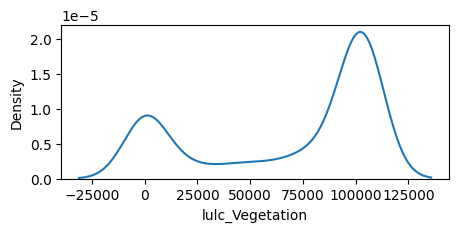

satatics:- 0.726 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



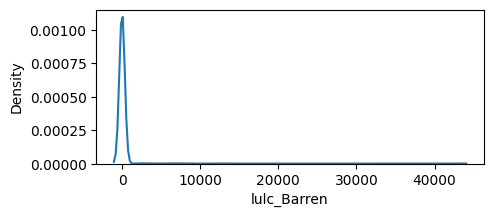

satatics:- 0.040 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



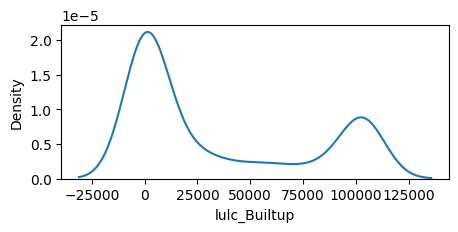

satatics:- 0.721 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



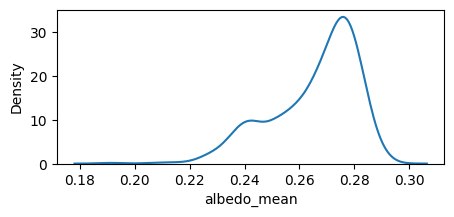

satatics:- 0.924 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



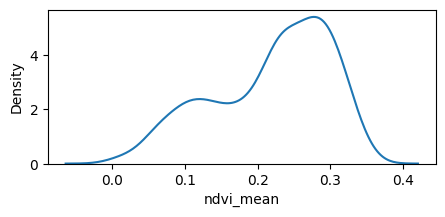

satatics:- 0.946 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



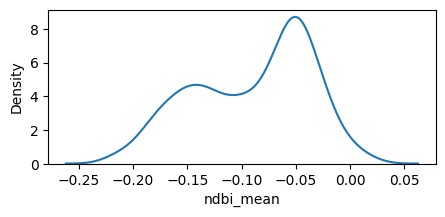

satatics:- 0.958 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



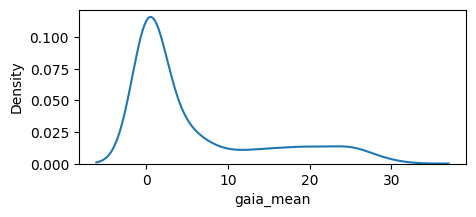

satatics:- 0.720 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



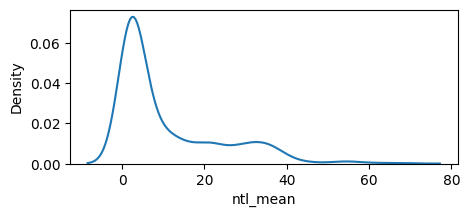

satatics:- 0.760 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



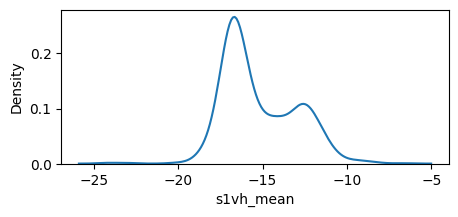

satatics:- 0.937 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



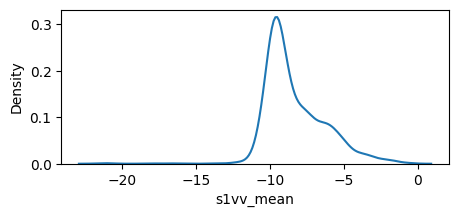

satatics:- 0.893 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



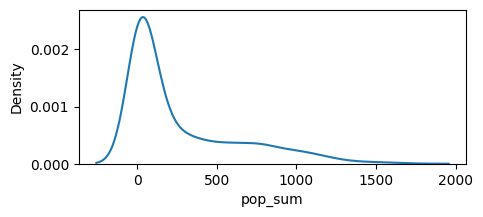

satatics:- 0.764 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



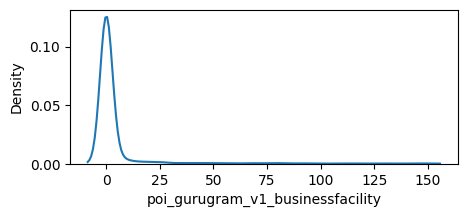

satatics:- 0.217 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



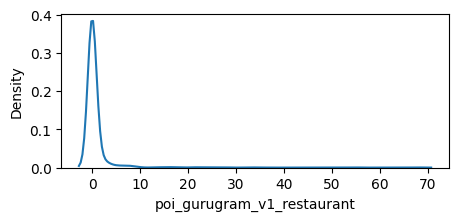

satatics:- 0.189 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



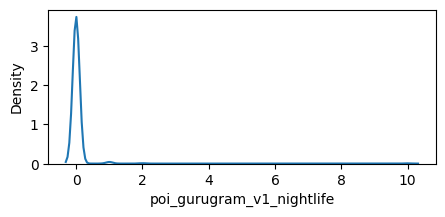

satatics:- 0.047 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



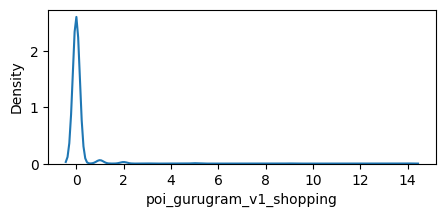

satatics:- 0.111 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



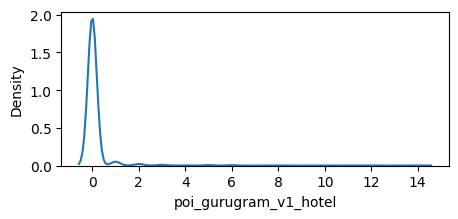

satatics:- 0.149 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



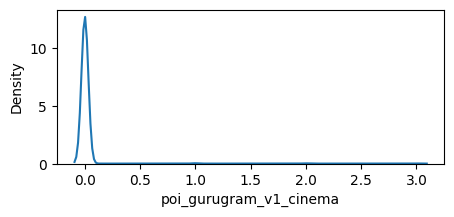

satatics:- 0.038 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



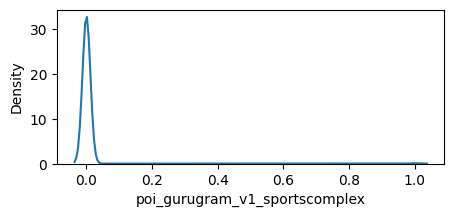

satatics:- 0.025 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



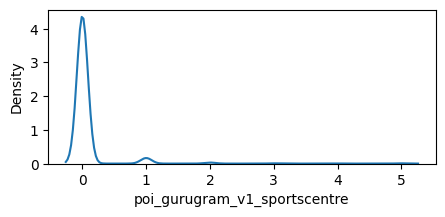

satatics:- 0.180 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



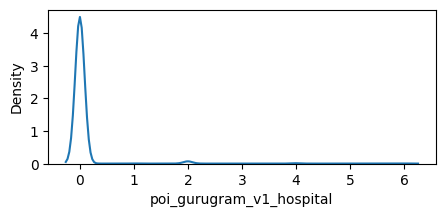

satatics:- 0.108 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



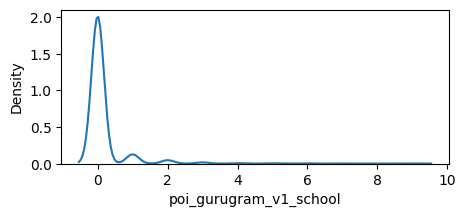

satatics:- 0.254 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



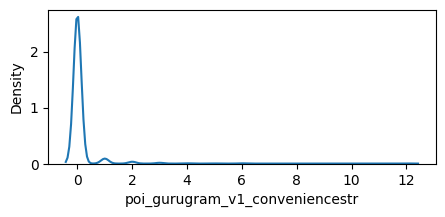

satatics:- 0.165 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



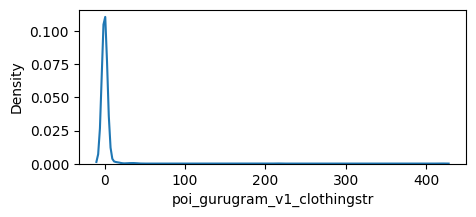

satatics:- 0.045 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



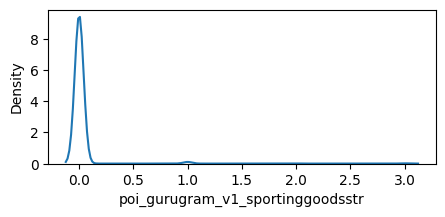

satatics:- 0.078 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



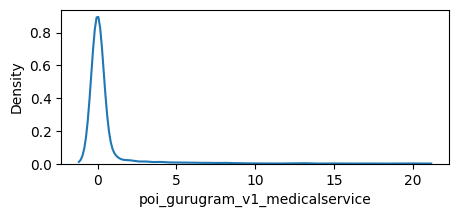

satatics:- 0.264 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



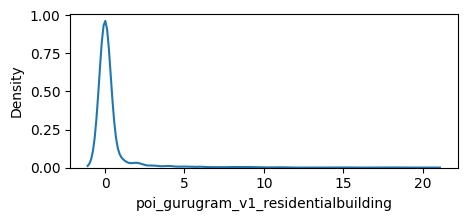

satatics:- 0.270 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



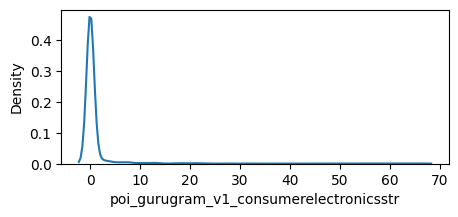

satatics:- 0.178 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



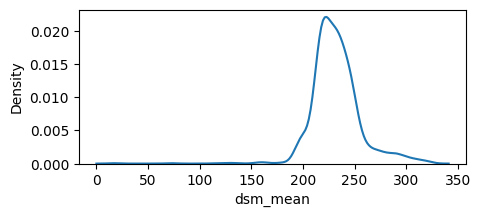

satatics:- 0.889 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



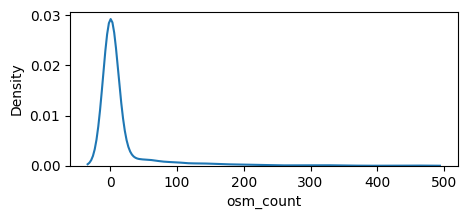

satatics:- 0.391 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



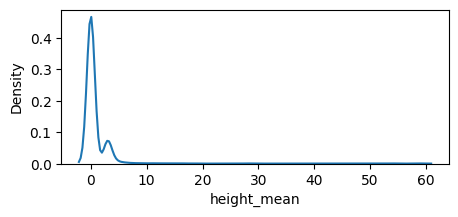

satatics:- 0.225 
 p:- 0.000
Above plot is NOT Normaly Distributer 
 



In [69]:
from scipy.stats import shapiro
for i in df_test.columns:
    stat,p = shapiro(df_test[i])
    plt.figure(figsize=(5,2))
    sns.kdeplot(data=df_test[i])
    plt.show()
    print("satatics:- {0:.3f}".format(stat),"\n","p:- {0:.3f}".format(p))
    if p>0.05:
        print("Above plot is Normaly Distributer","\n","\n")
    else:
        print("Above plot is NOT Normaly Distributer","\n","\n")
    

### Line charts of to show the similarity in pattern with tha data target variable 

C:\Users\chemi\AppData\Local\Temp\ipykernel_30752\1157030480.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax1 = plt.subplots(figsize=(15,4))


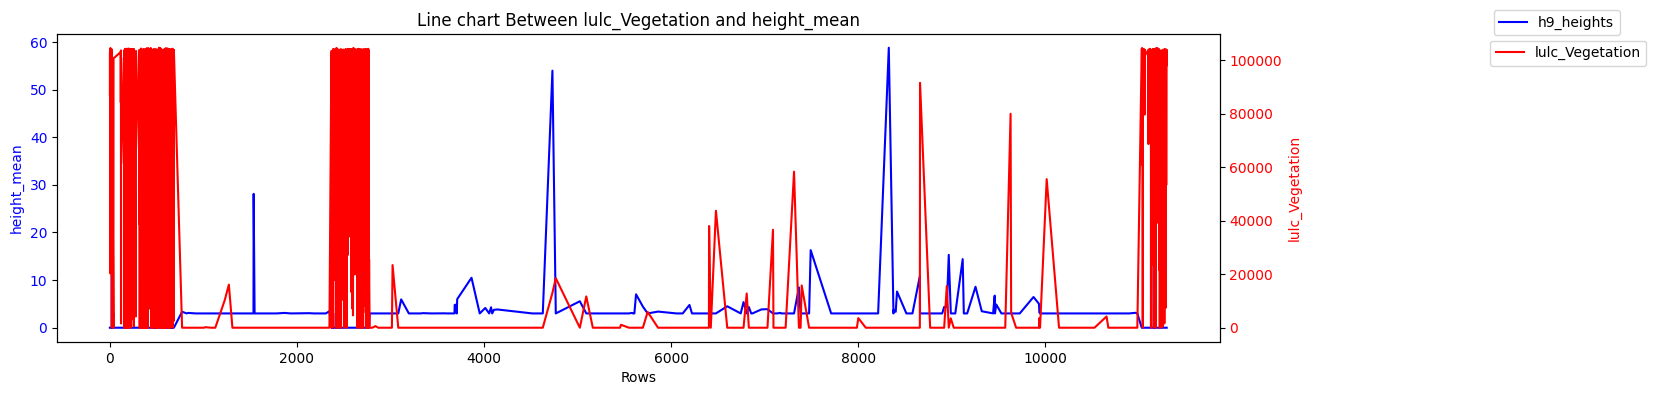

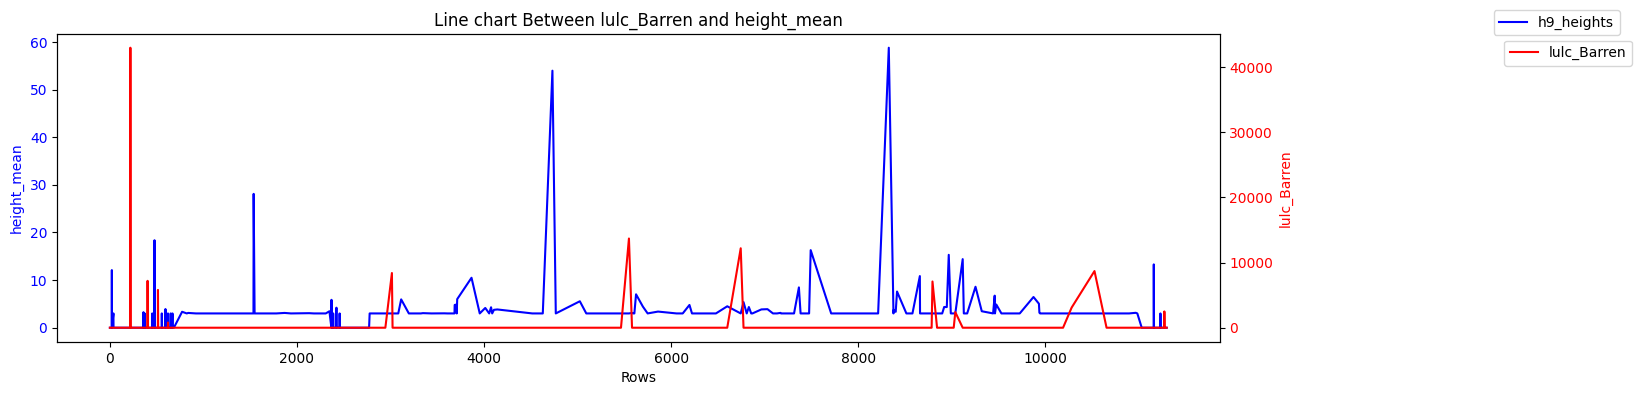

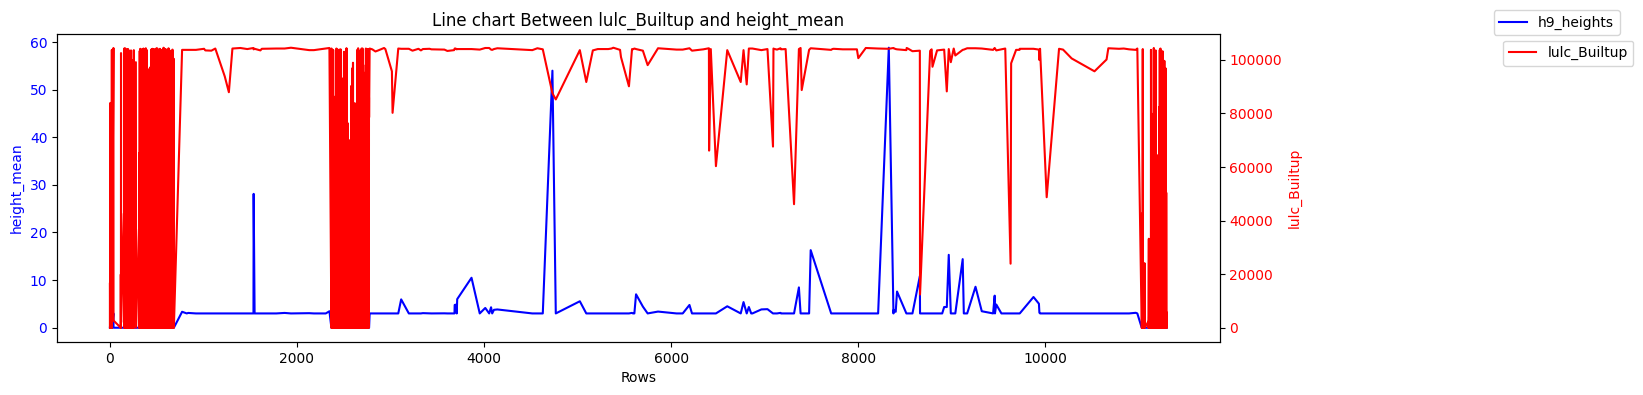

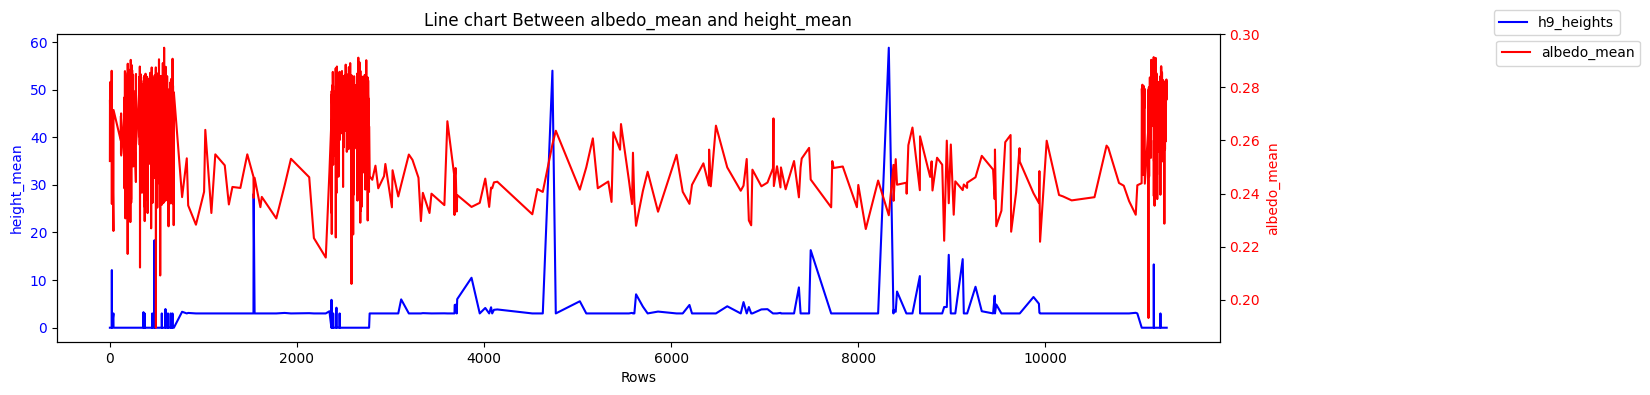

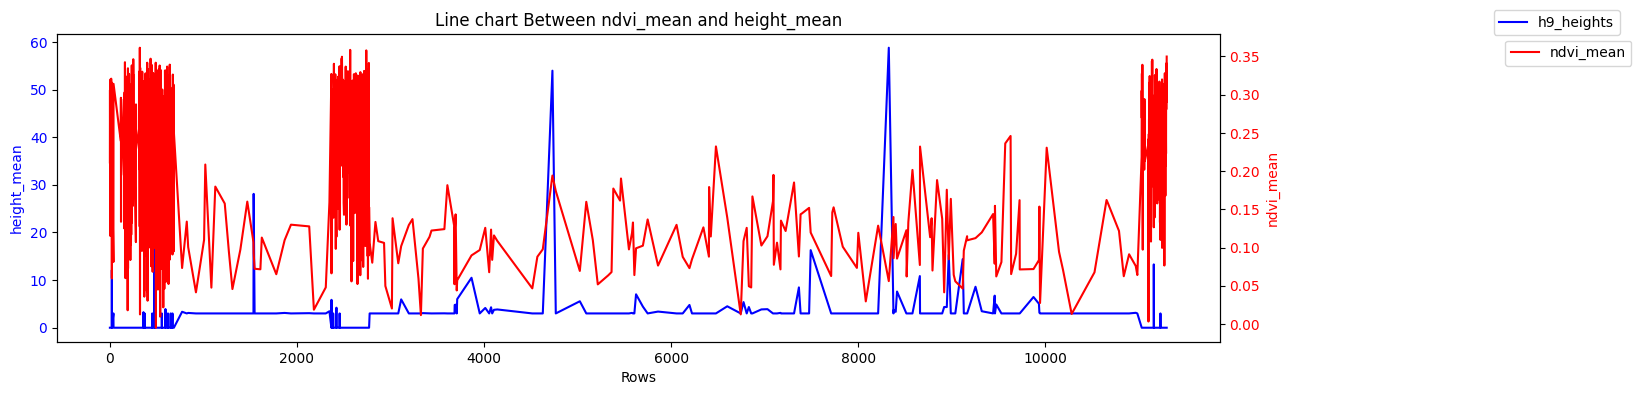

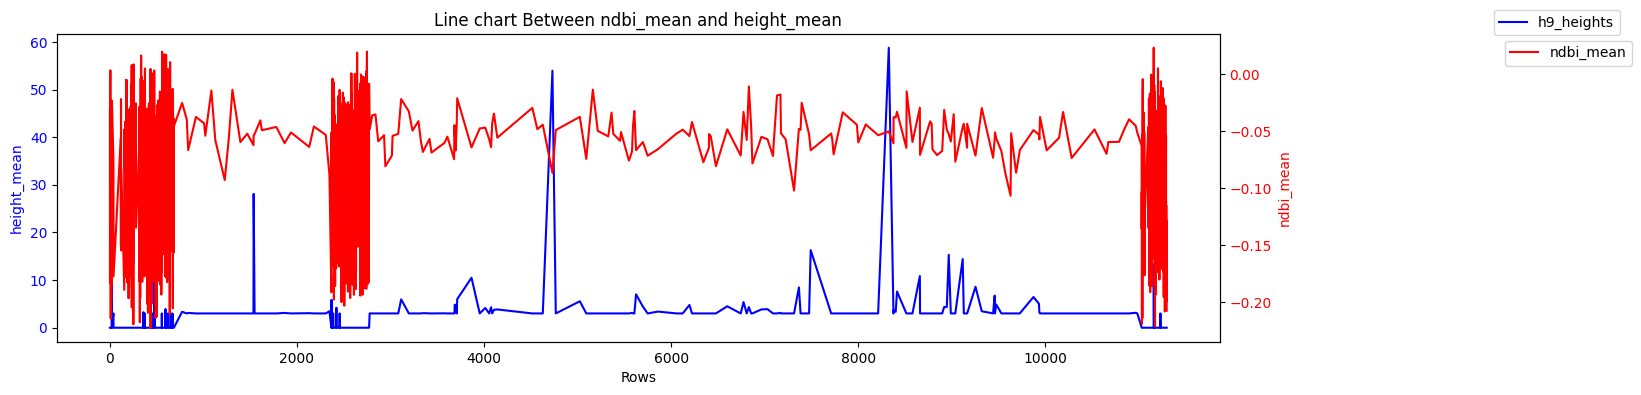

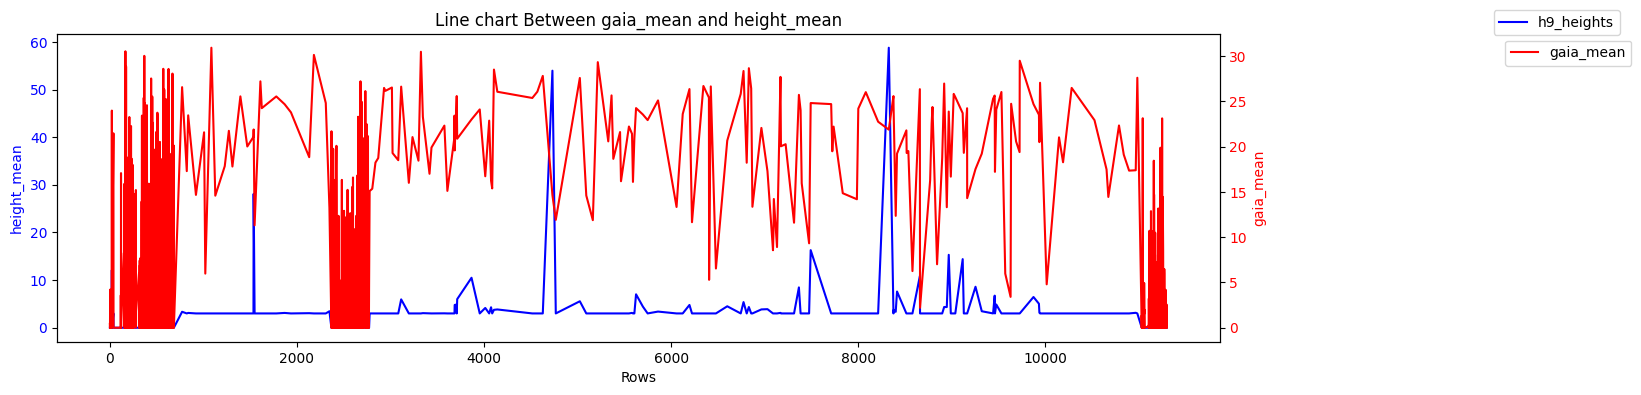

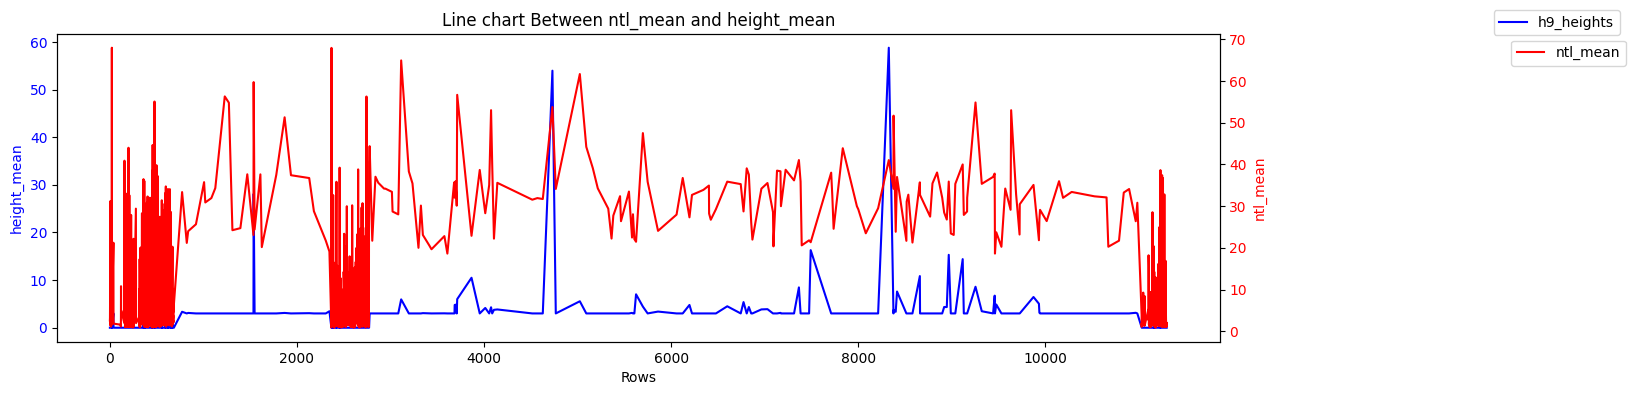

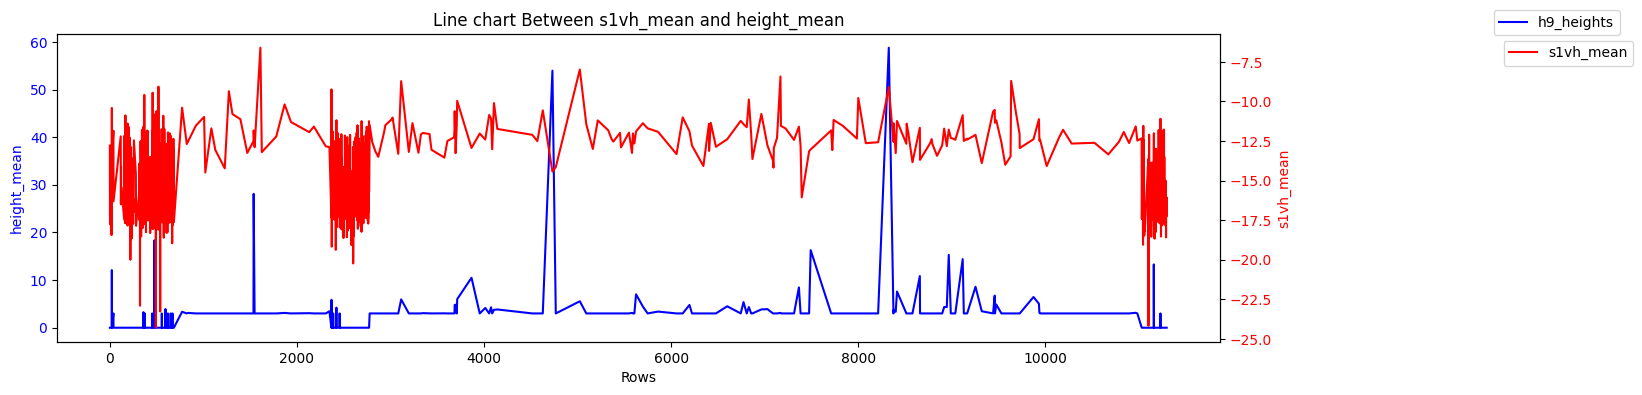

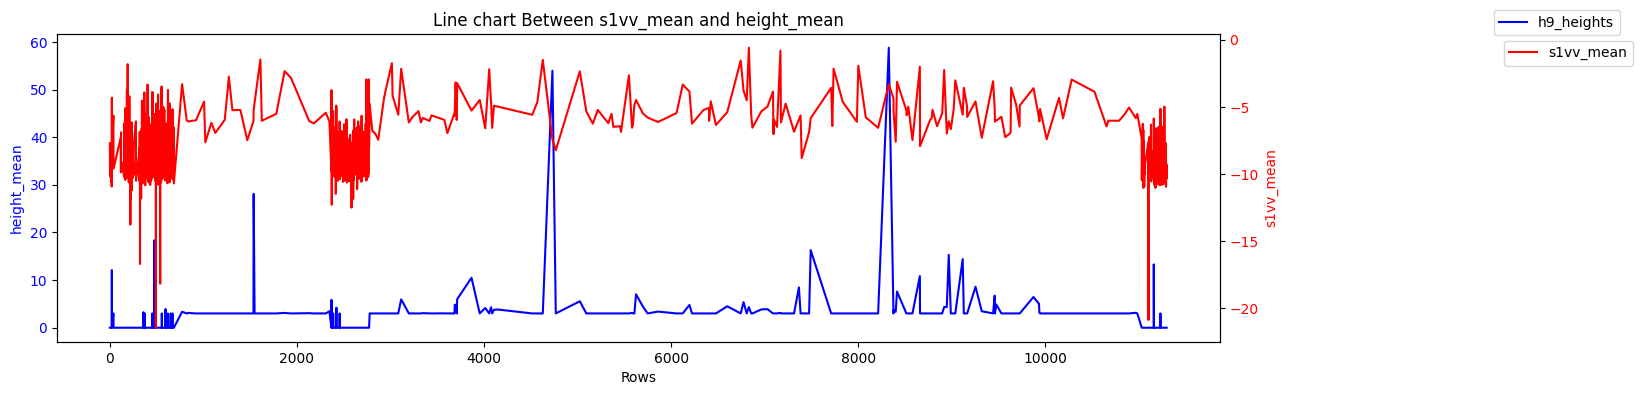

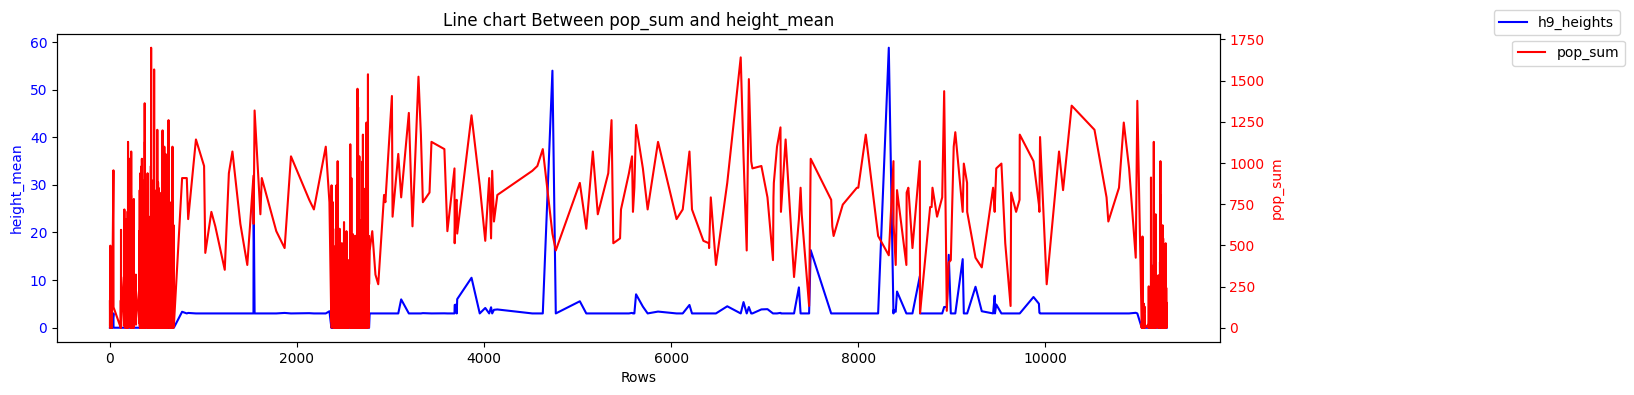

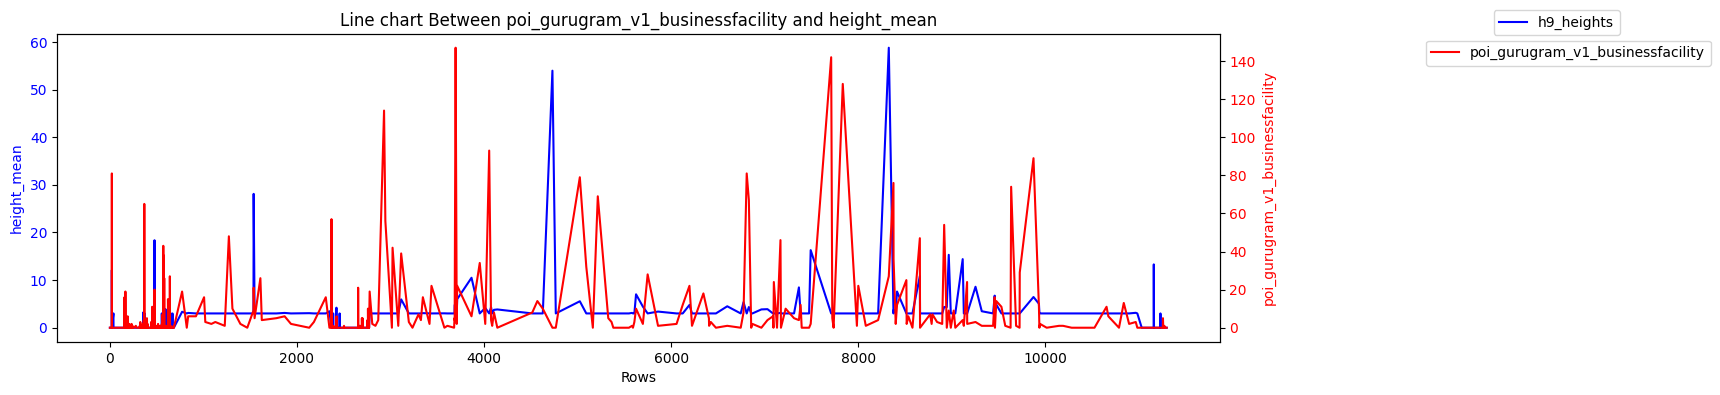

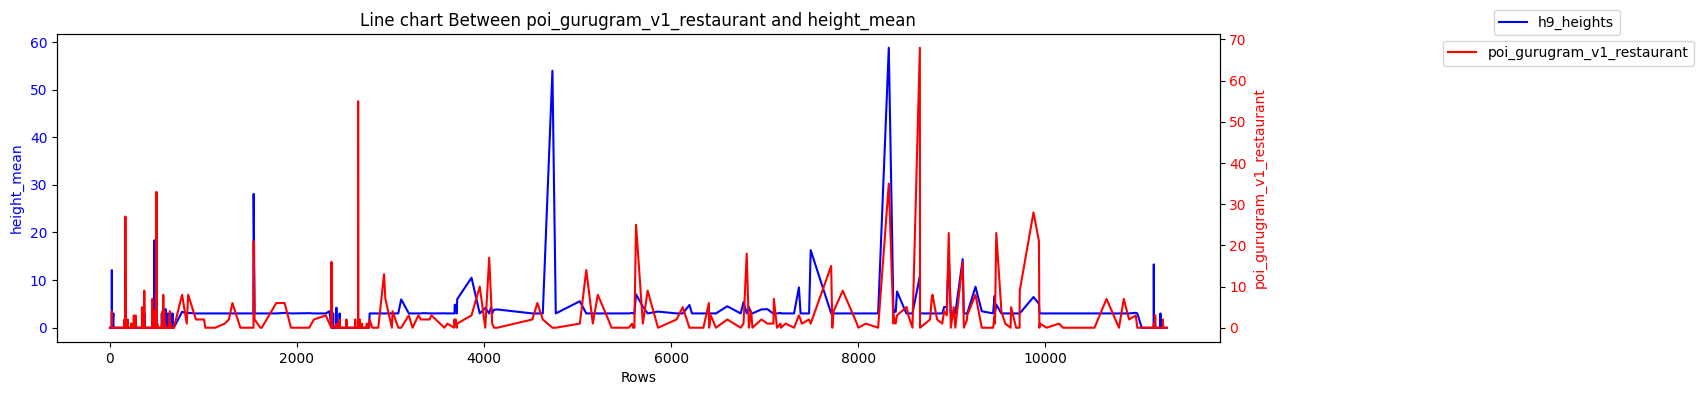

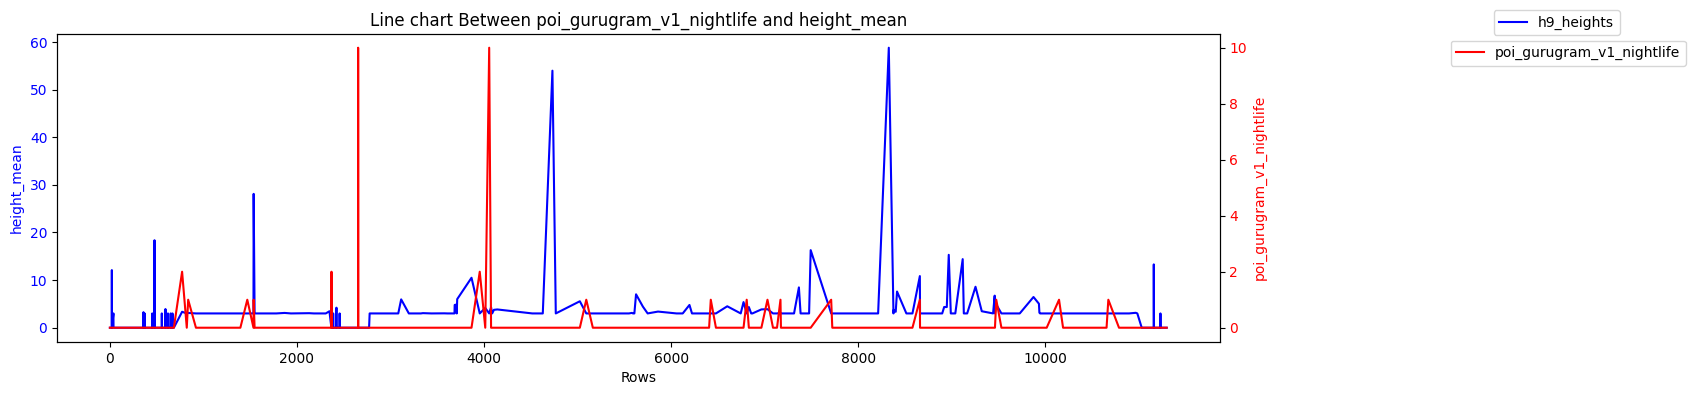

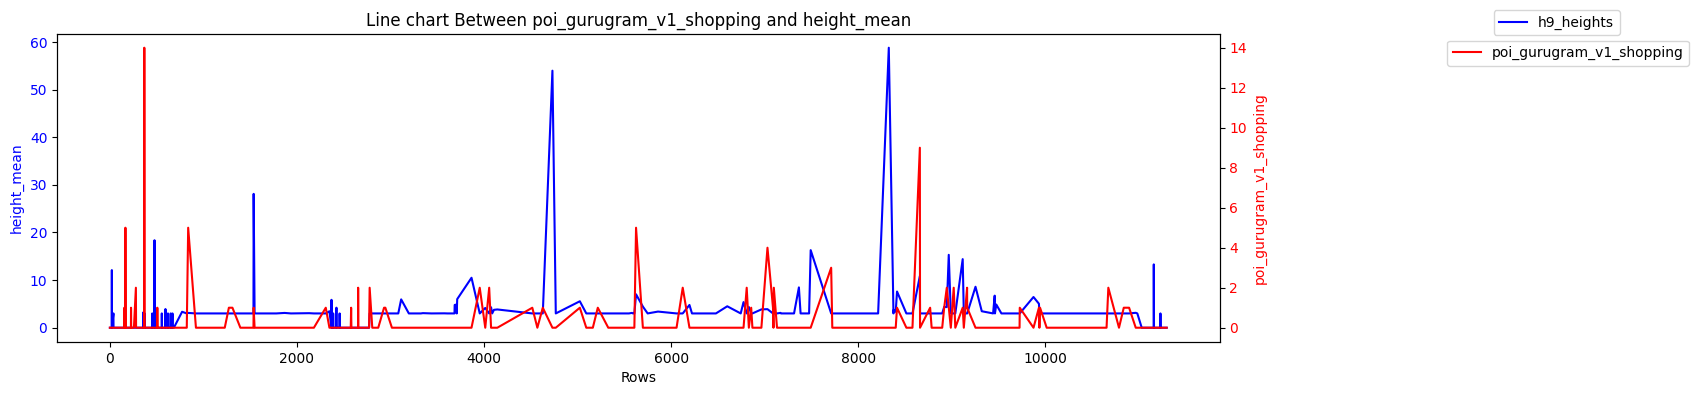

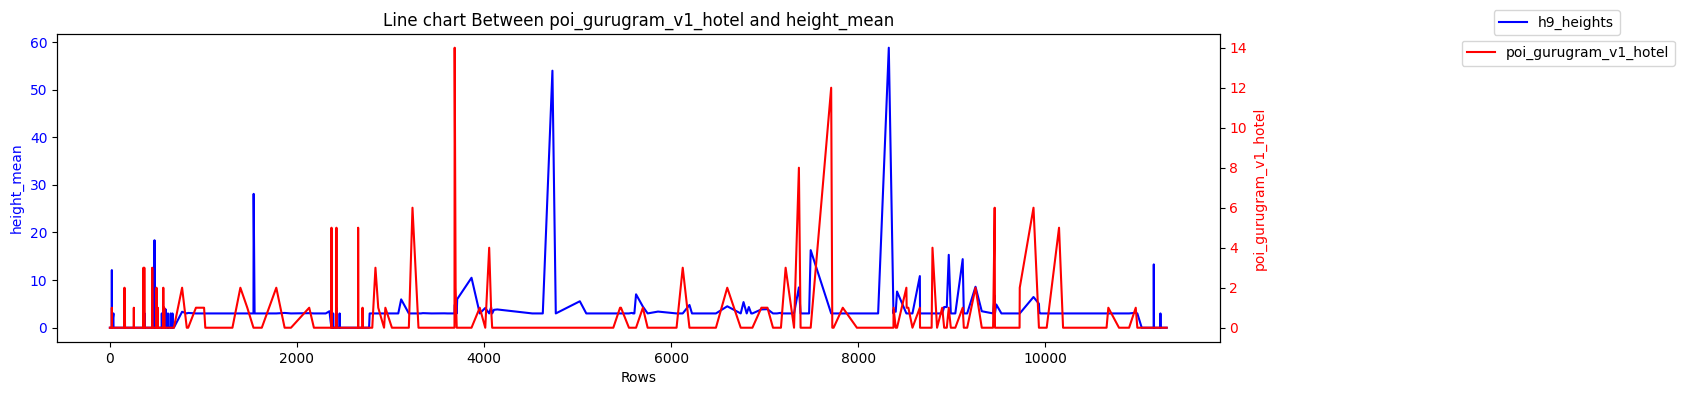

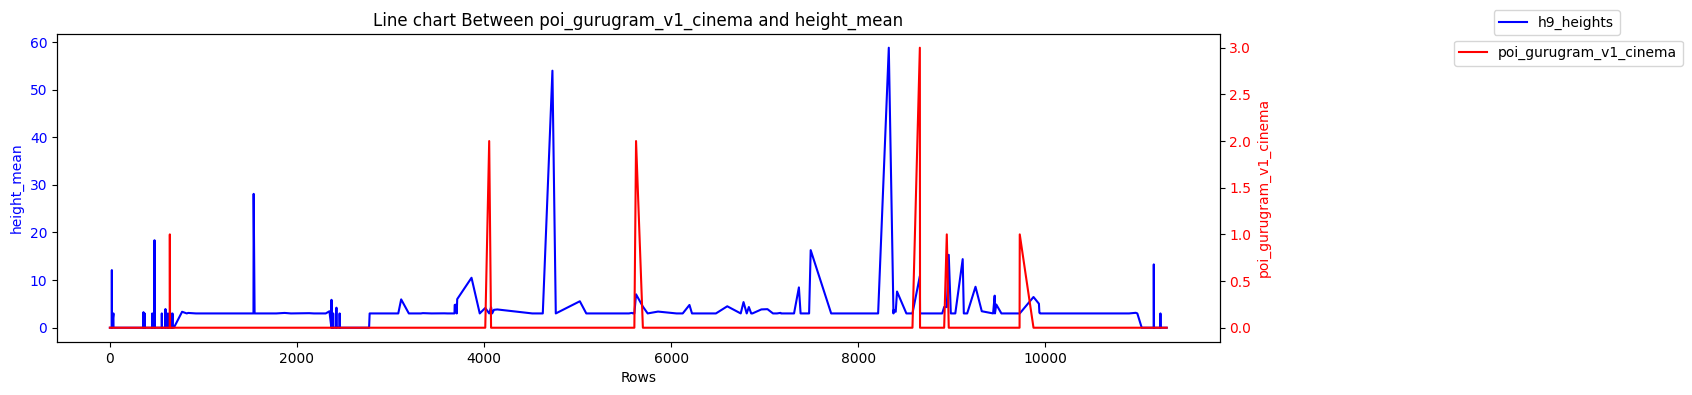

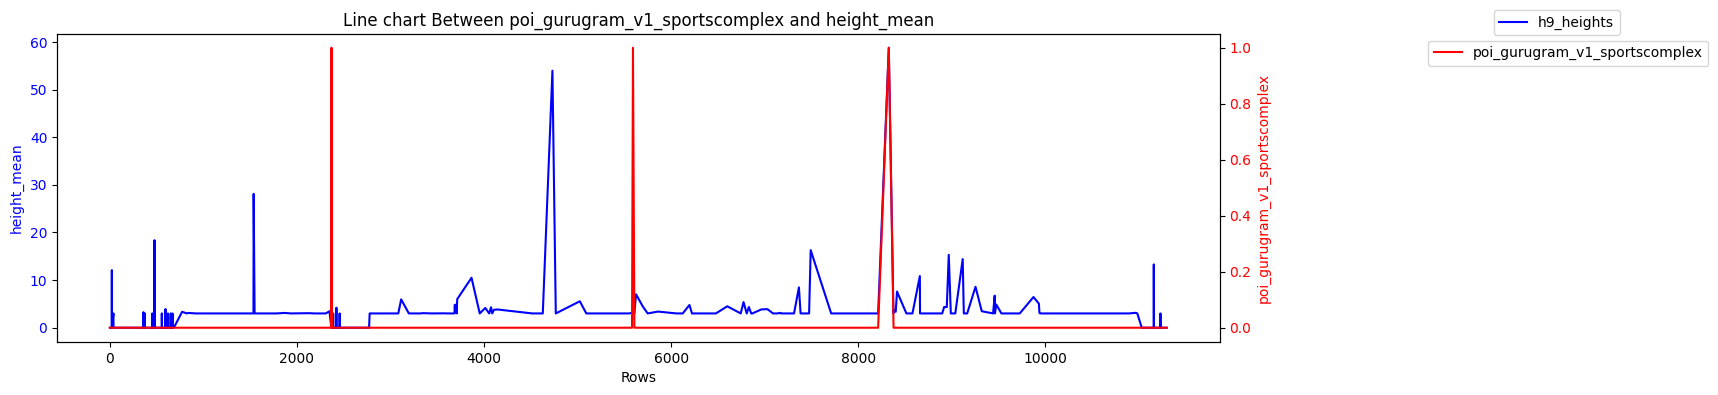

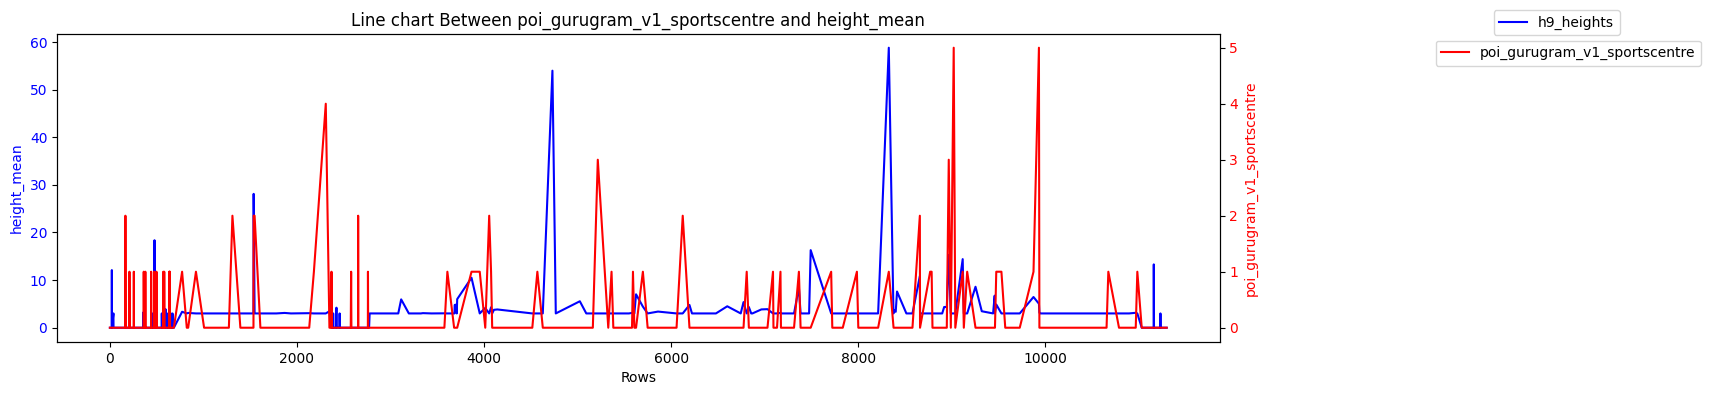

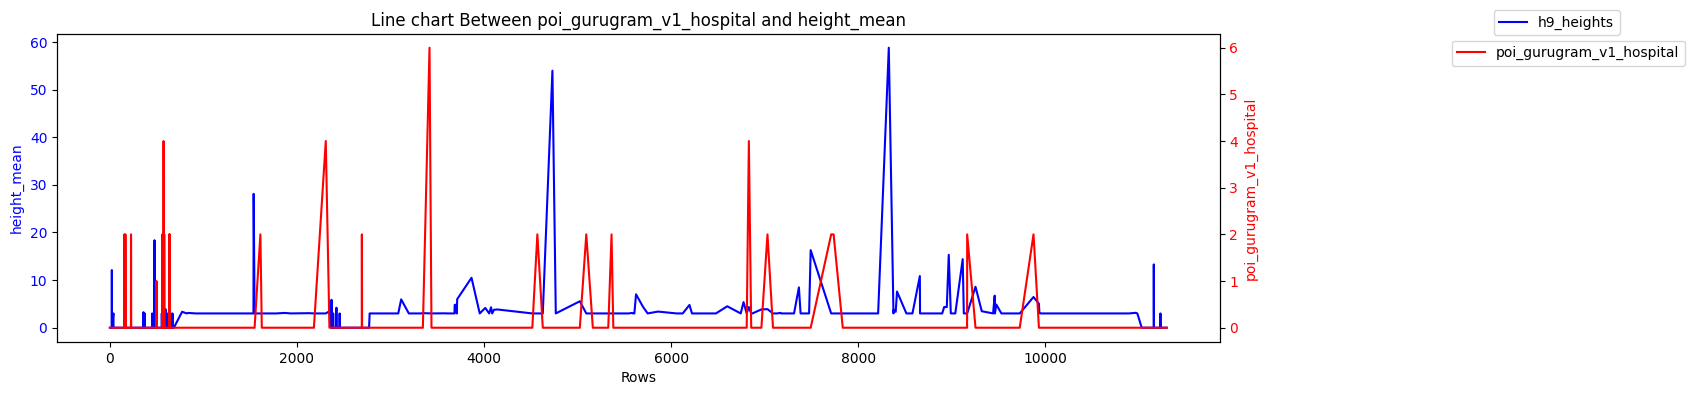

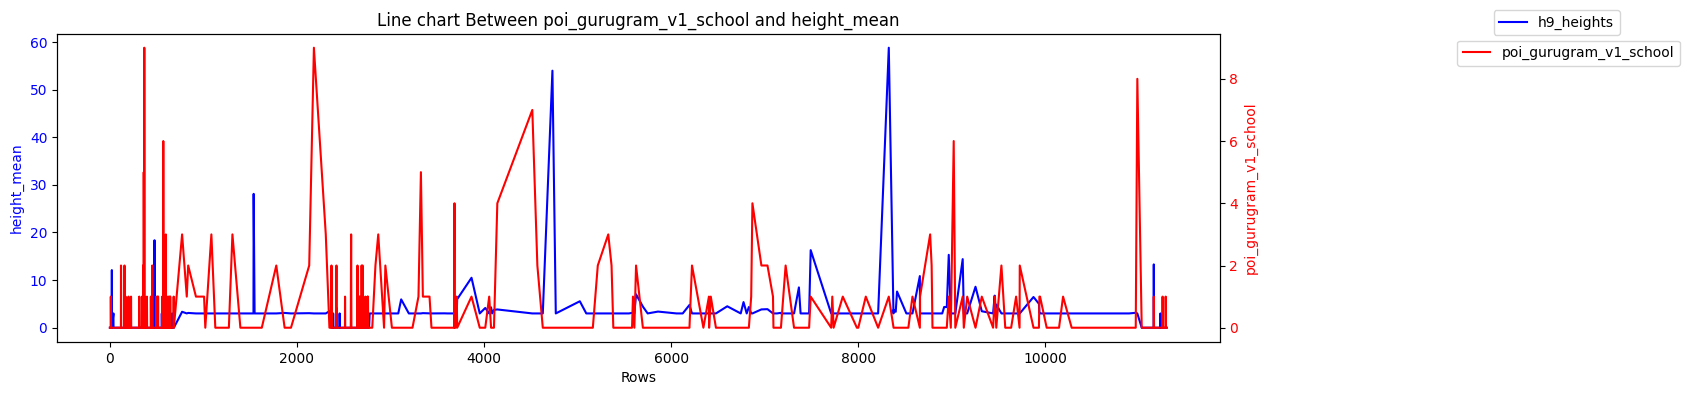

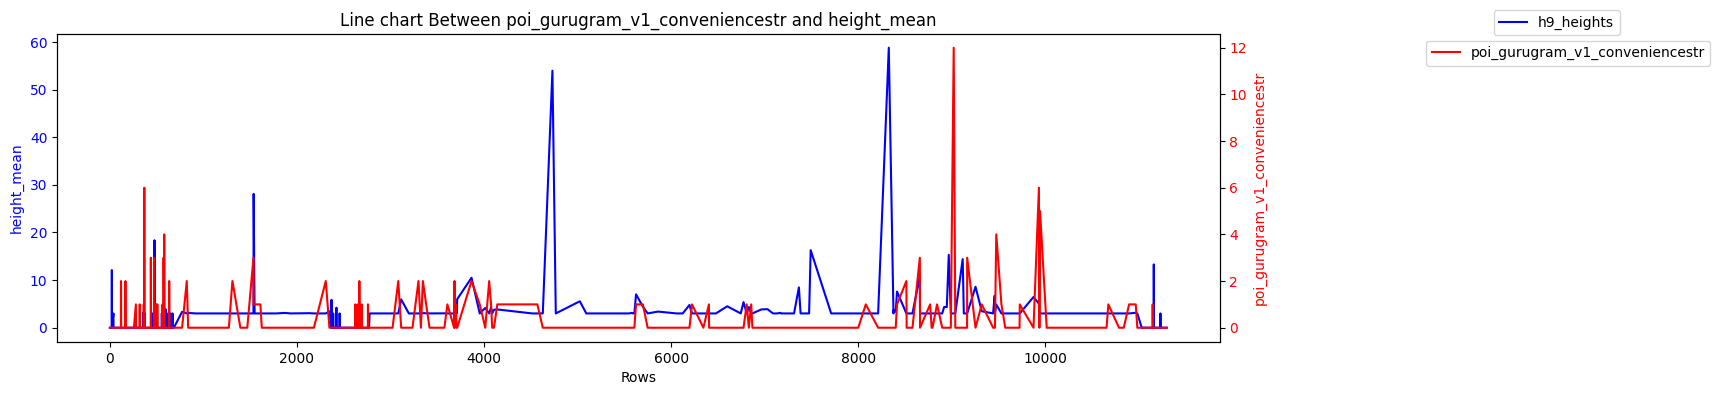

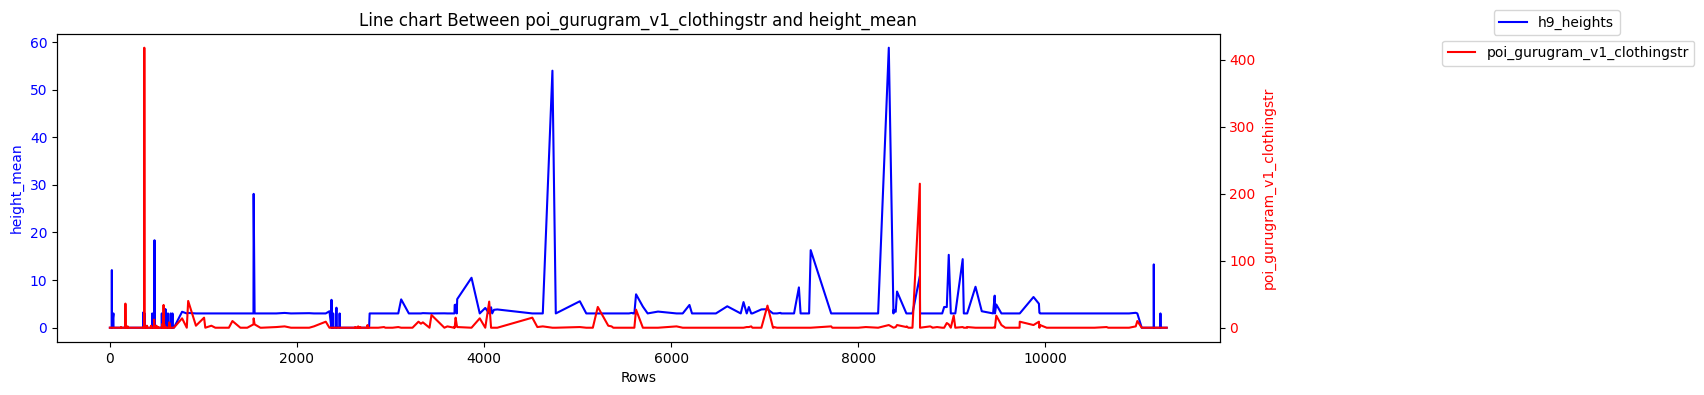

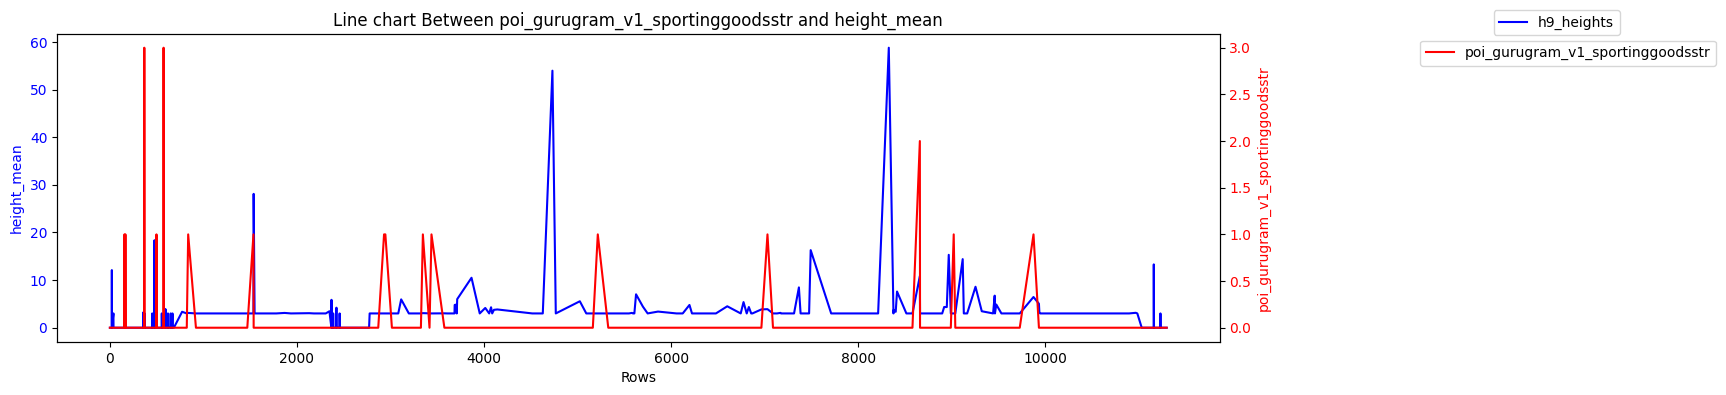

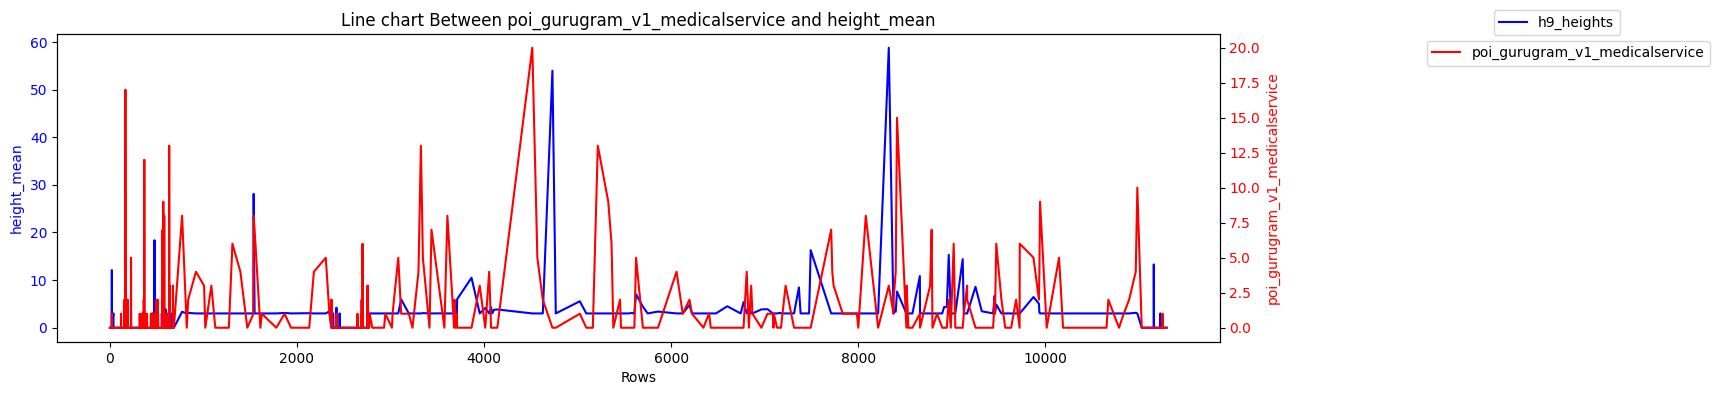

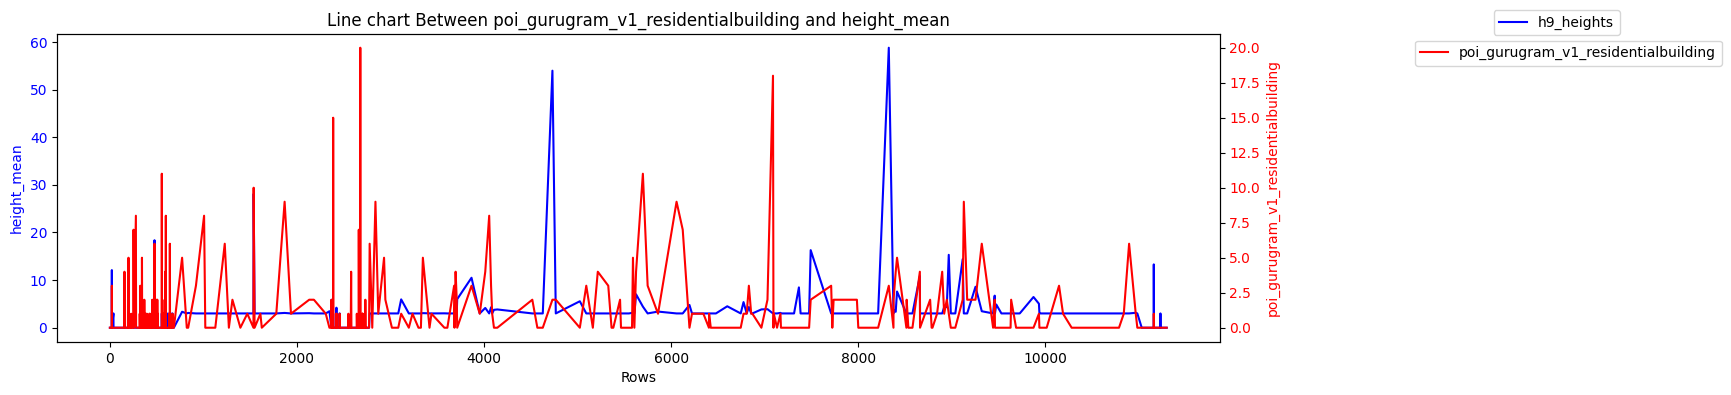

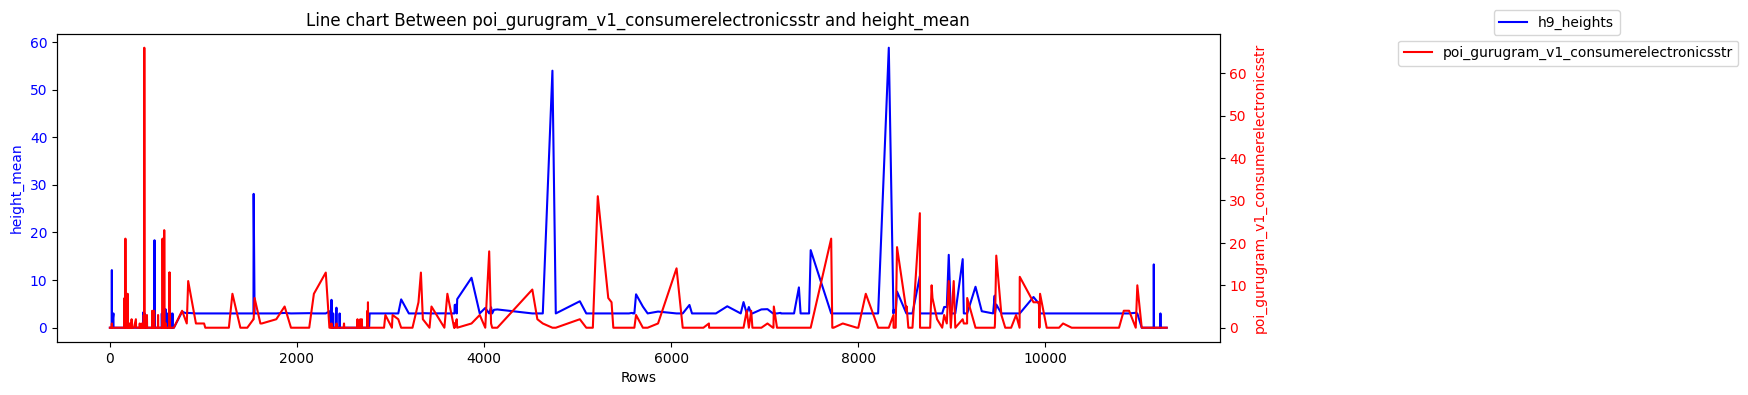

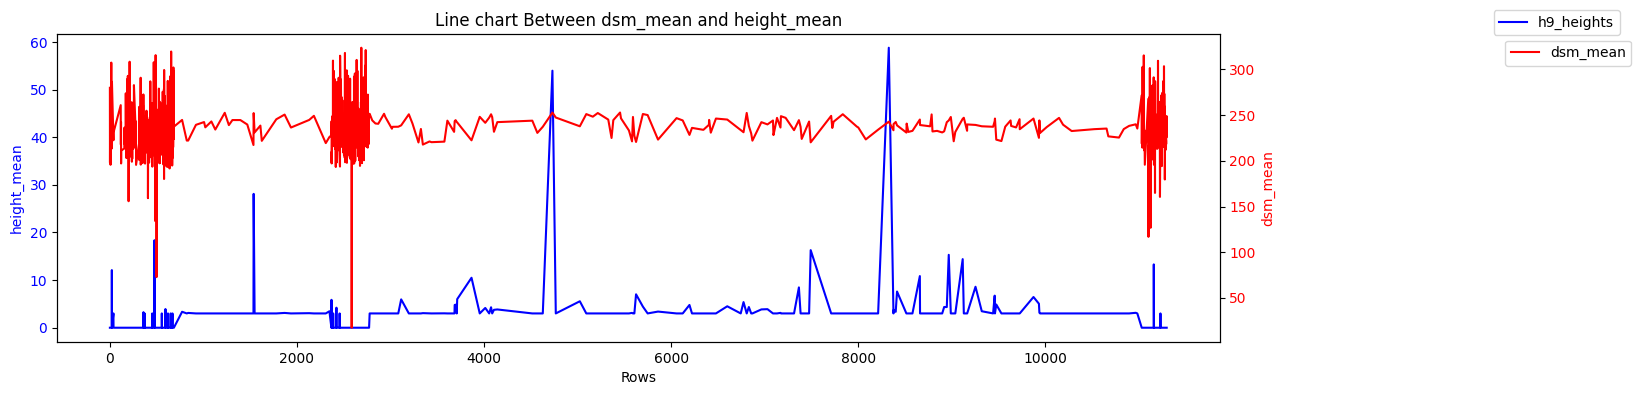

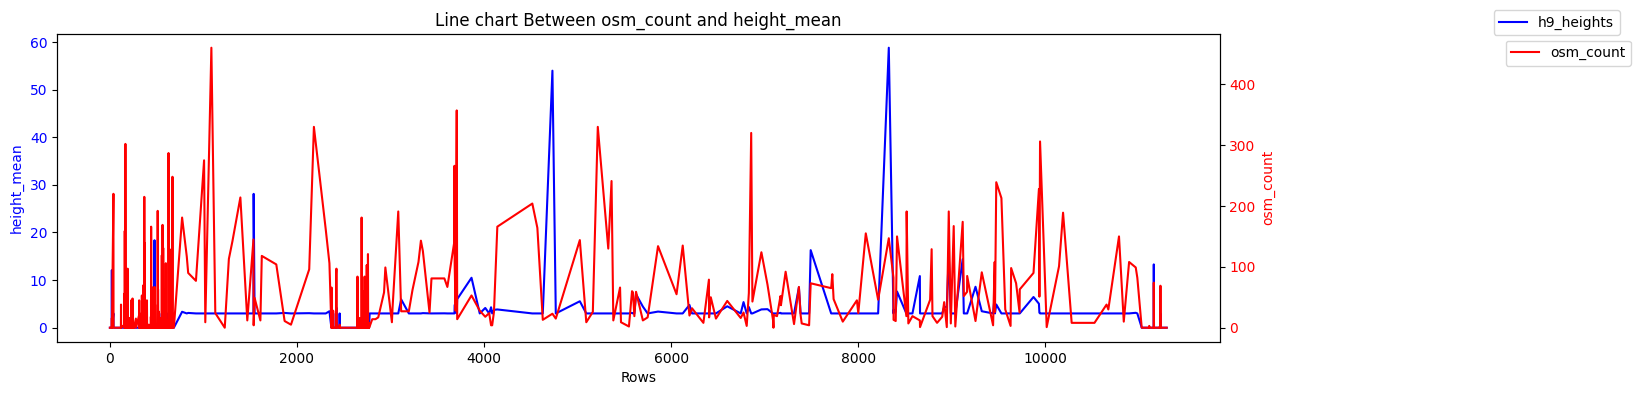

In [70]:
for i in df_test.columns[:-1]:
    fig, ax1 = plt.subplots(figsize=(15,4))
    ax1.plot(df_test["height_mean"], color='blue',label="h9_heights")
    ax1.set_ylabel("height_mean", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    plt.legend(bbox_to_anchor=(1.29, 1.1), loc='upper center')
   

    ax2 = ax1.twinx()
    ax2.plot(df_test[i] , color='red',label=i)
    #ax2.set_ylim(0, 1)  # set the range for the second axis
    ax2.set_ylabel(i, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    plt.legend(bbox_to_anchor=(1.3, 1.0), loc='upper center')
    
   
    
    ax1.set_xlabel('Rows')
    ax1.set_title(f'Line chart Between {i} and height_mean')
    


#### Here is the boxplot which shows  outlier present in each column but s1_vh_mean and h8_heights_mean have more outlier

C:\Users\chemi\AppData\Local\Temp\ipykernel_30752\3756662529.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,2))


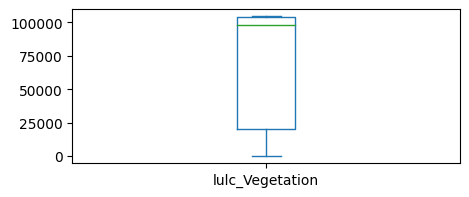

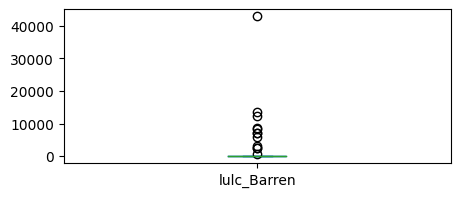

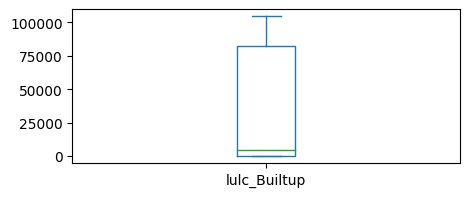

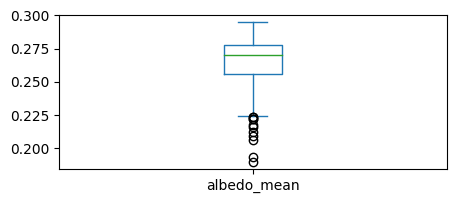

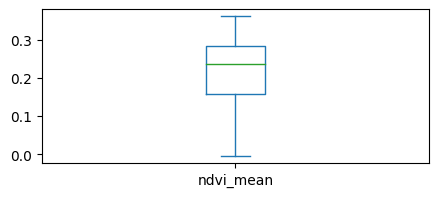

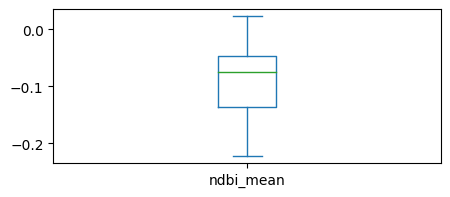

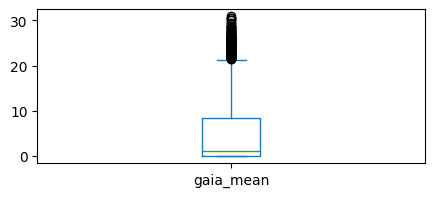

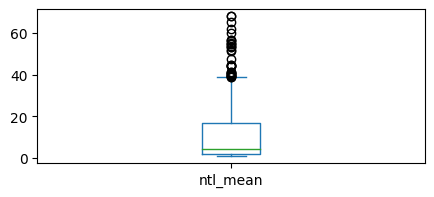

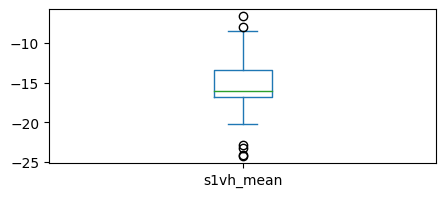

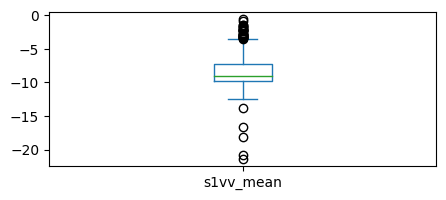

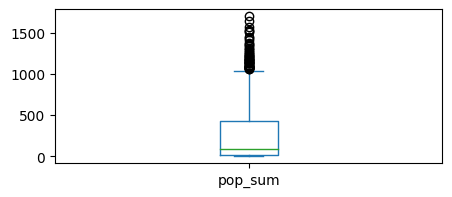

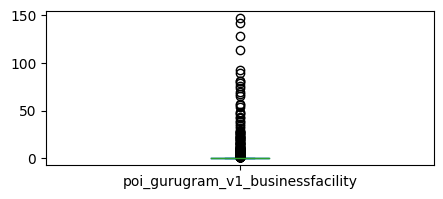

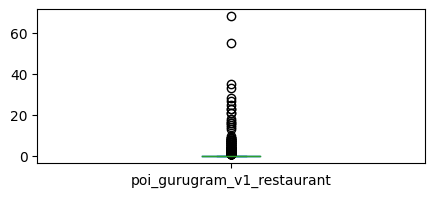

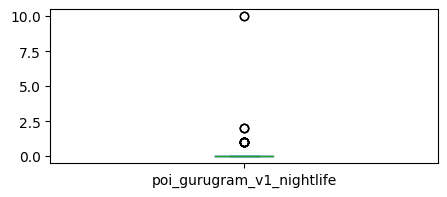

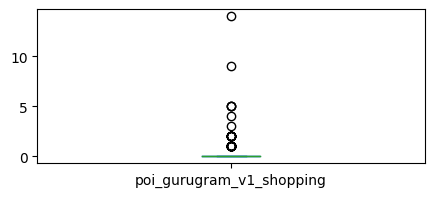

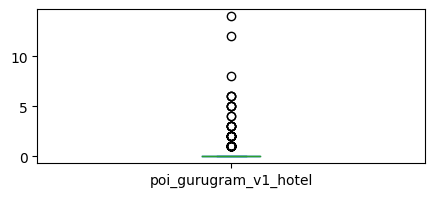

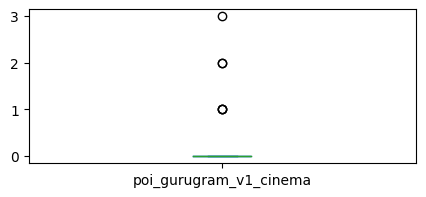

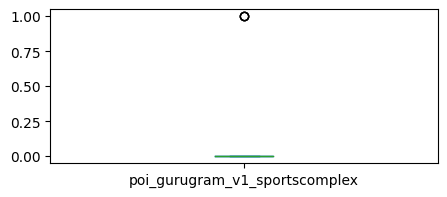

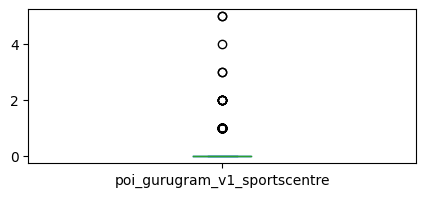

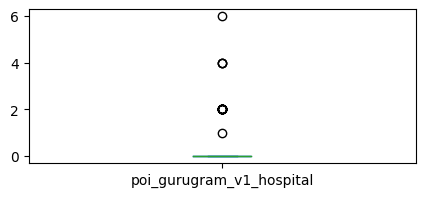

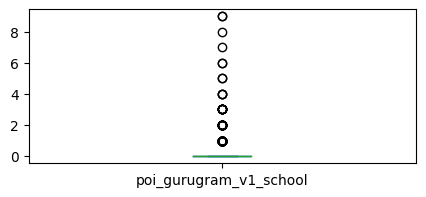

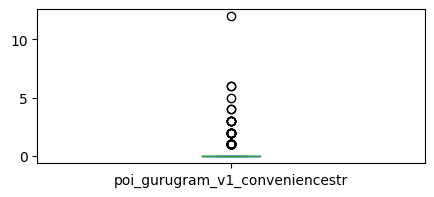

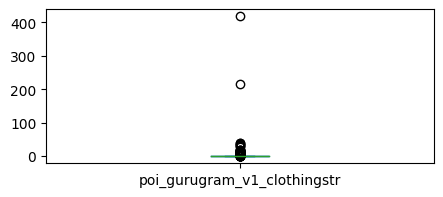

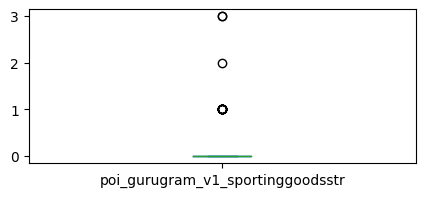

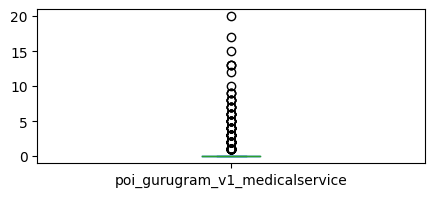

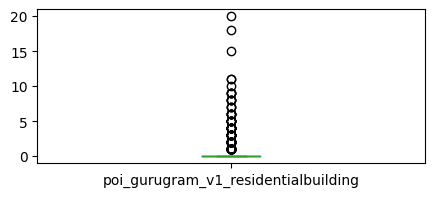

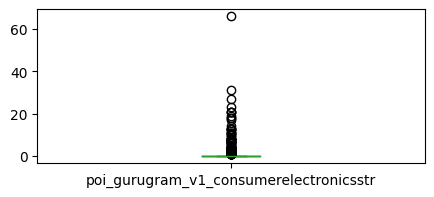

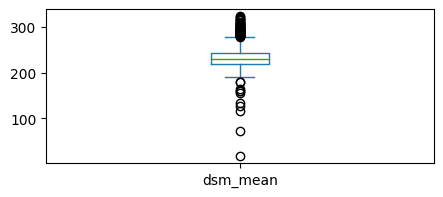

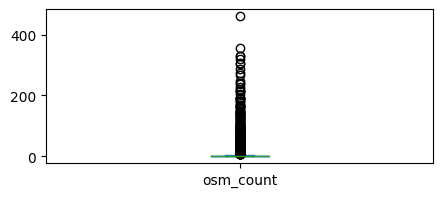

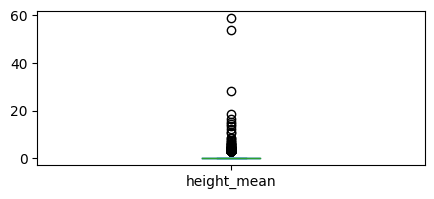

In [71]:
for i in df_test.columns:
    plt.figure(figsize=(5,2))
    df_test[i].plot(kind="box")
    #there is some outlier in  s1_vh_mean and h8_heights_mean

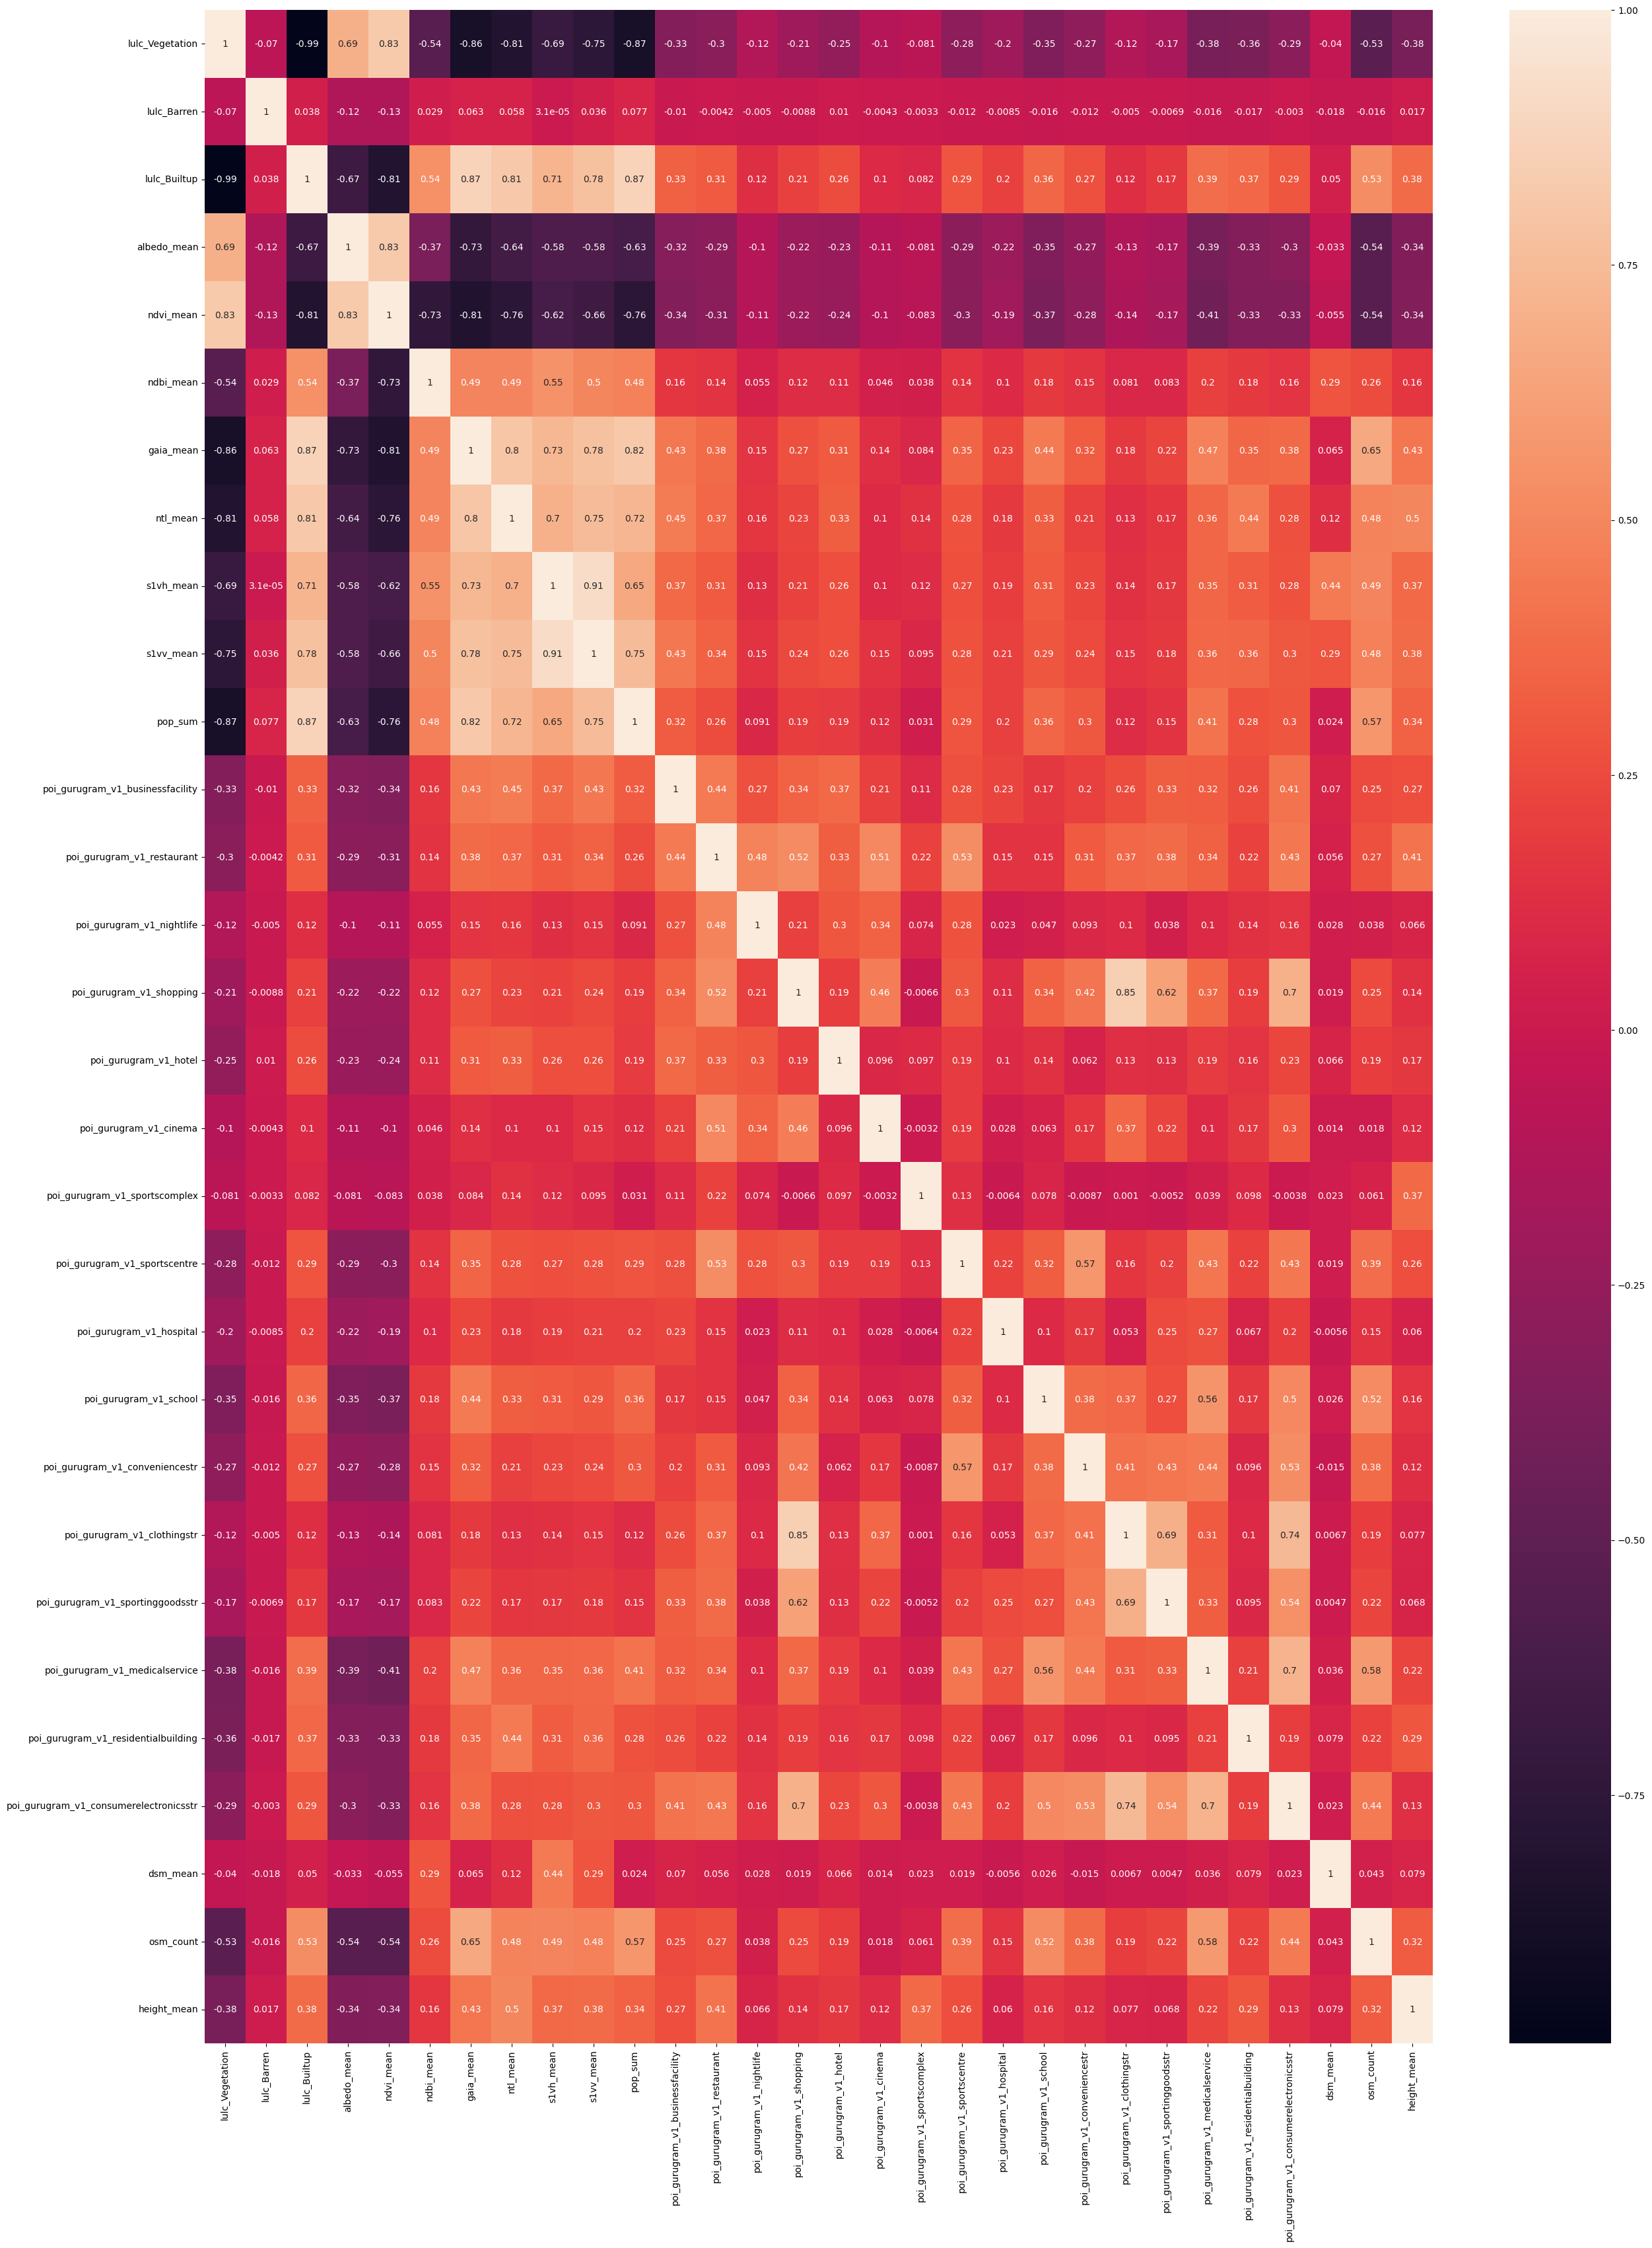

In [72]:
plt.figure(figsize=(30,40))
sns.heatmap(df_test.corr(),annot=True)
plt.show()
# There is highest positive correlation btw albedo_mean & ndvi_mean 
# There is highest negative correlation btw gaib_mean and h8_heights_mean

### Scatter plot shows the distribution of column with respect to height

C:\Users\chemi\AppData\Local\Temp\ipykernel_30752\3627519083.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


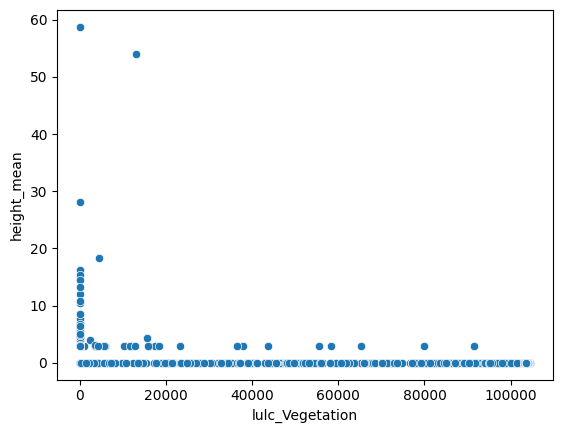

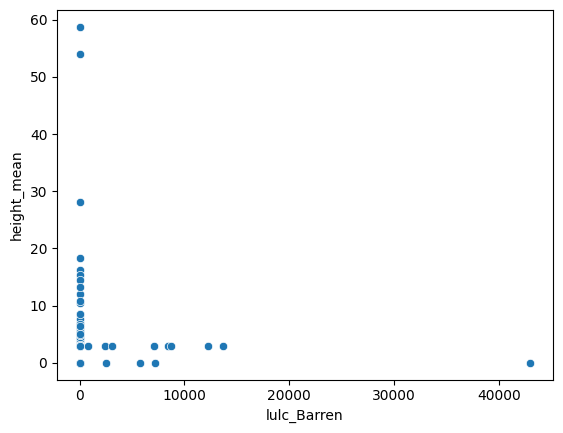

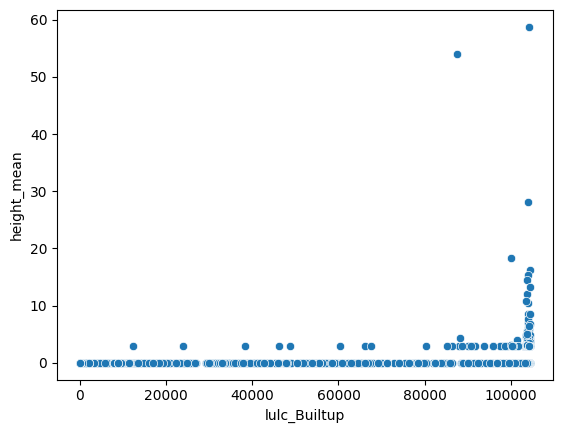

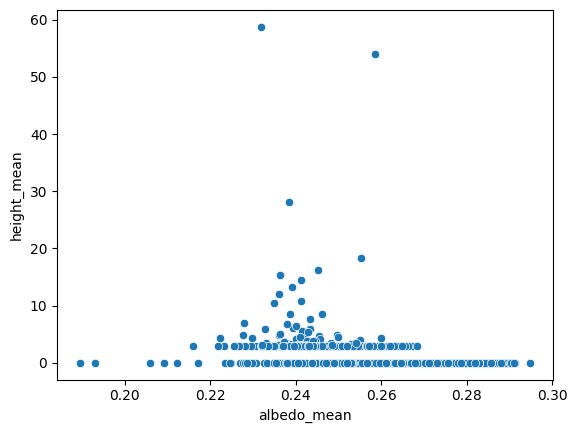

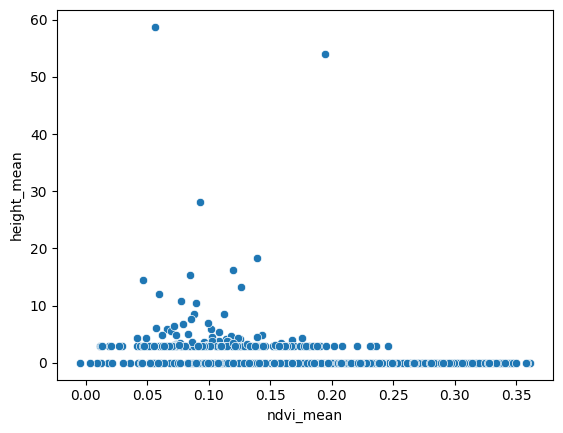

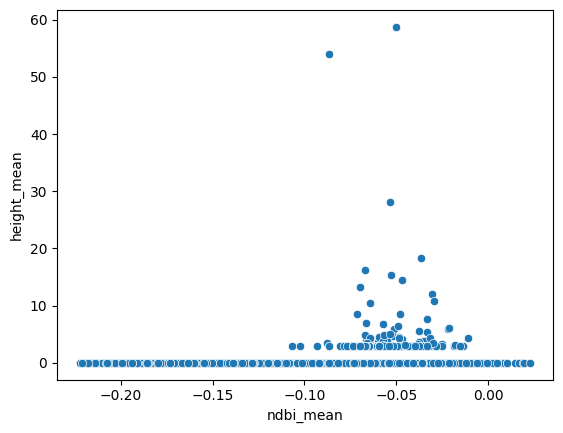

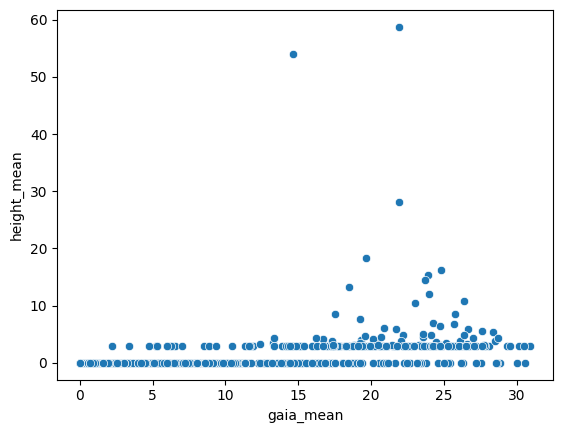

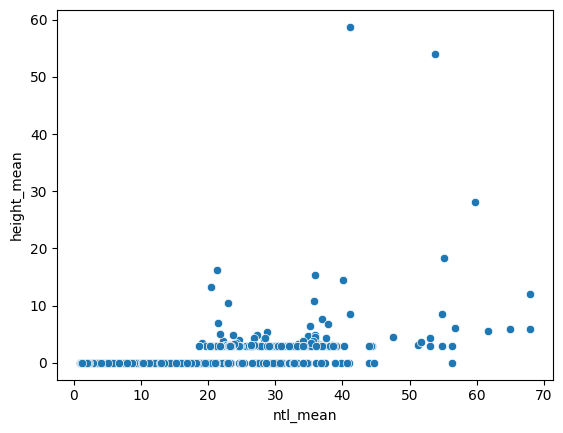

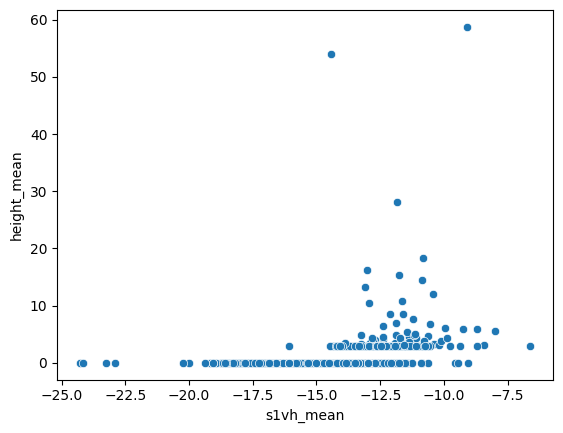

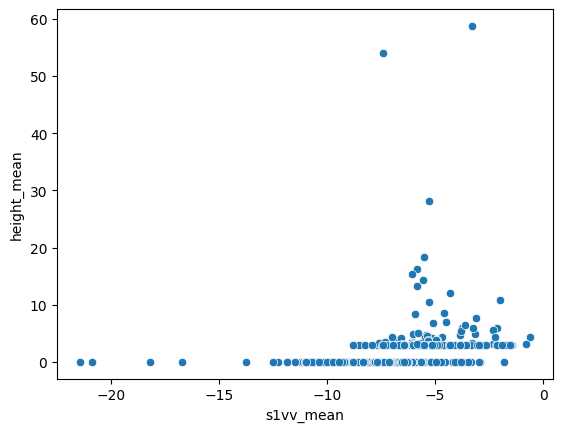

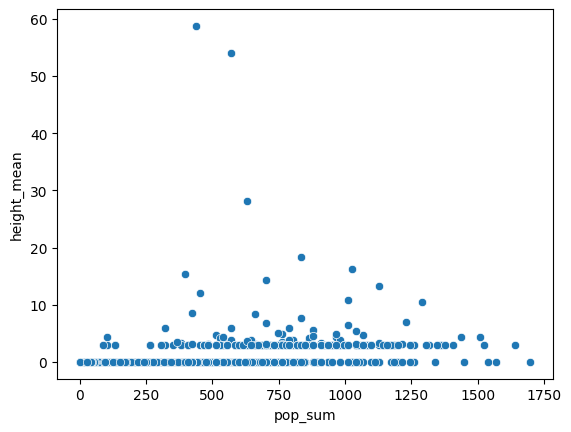

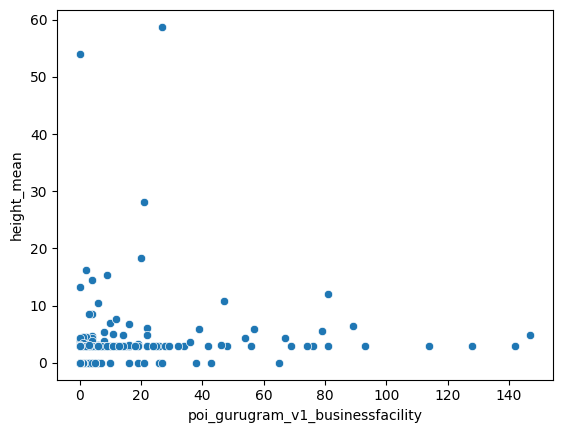

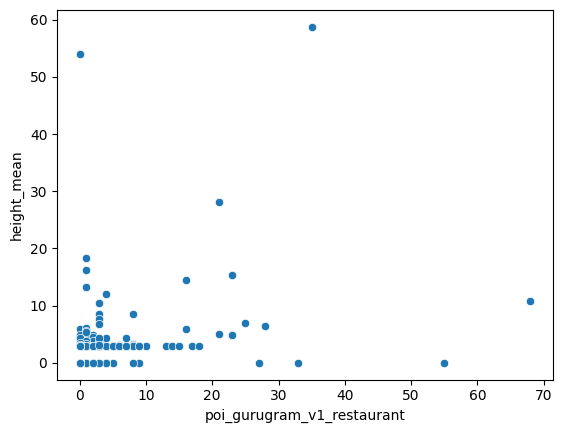

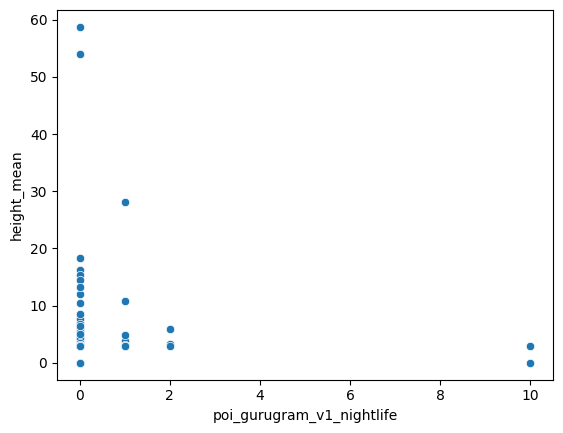

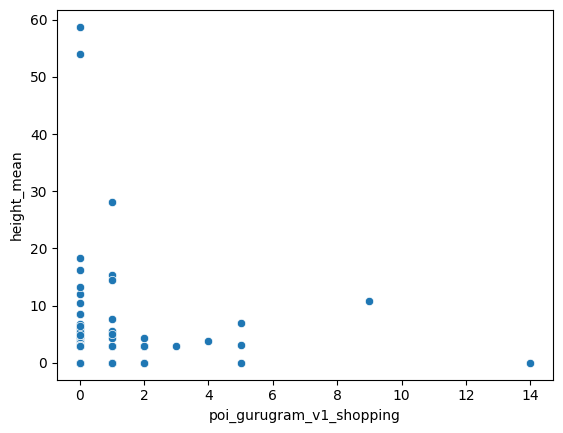

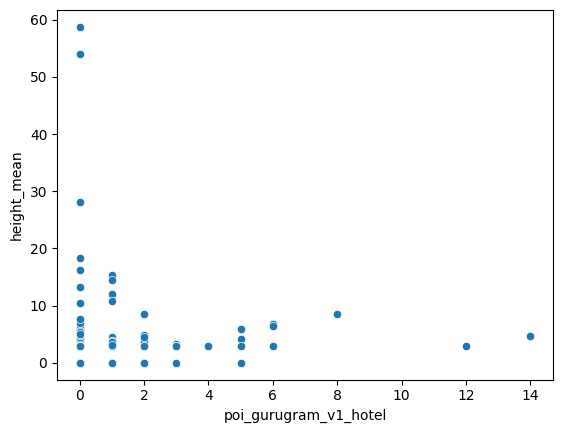

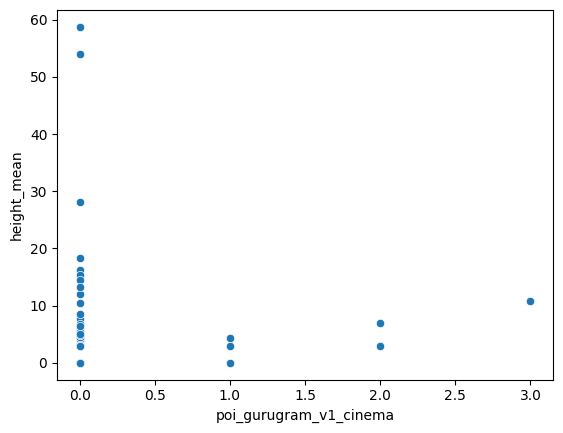

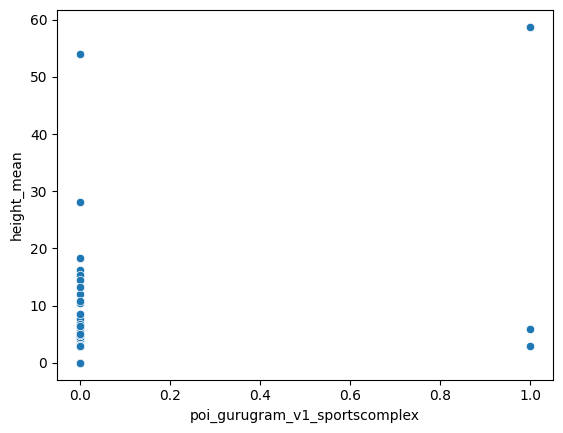

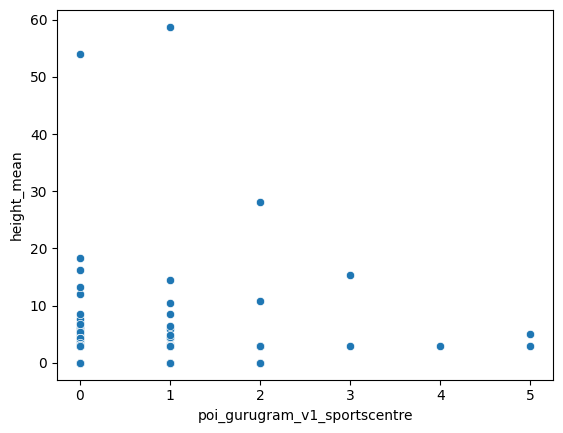

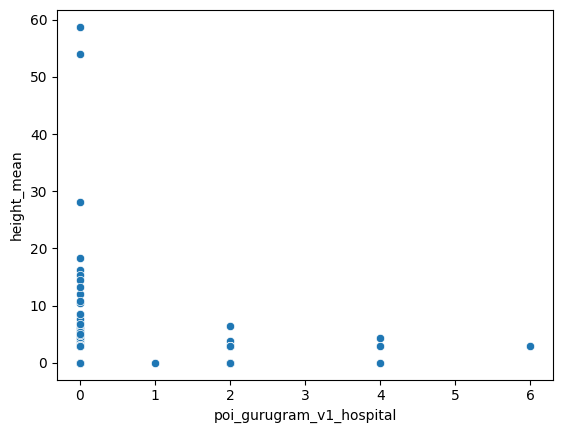

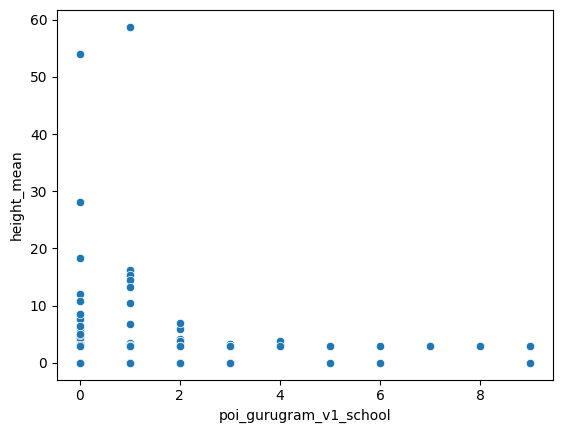

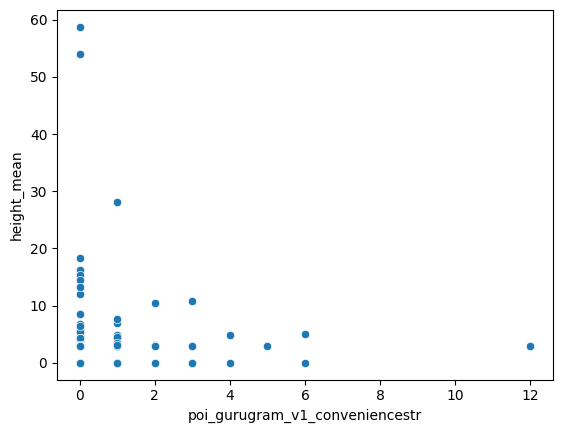

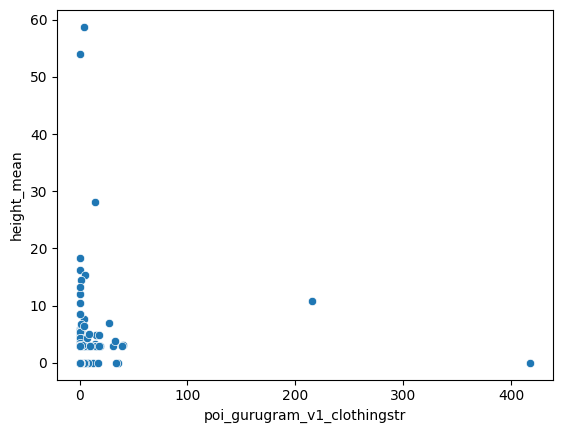

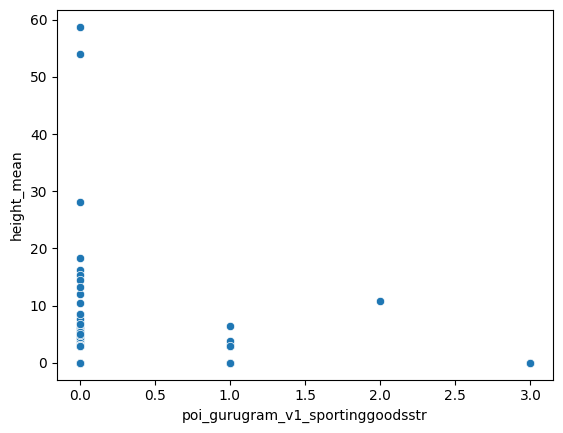

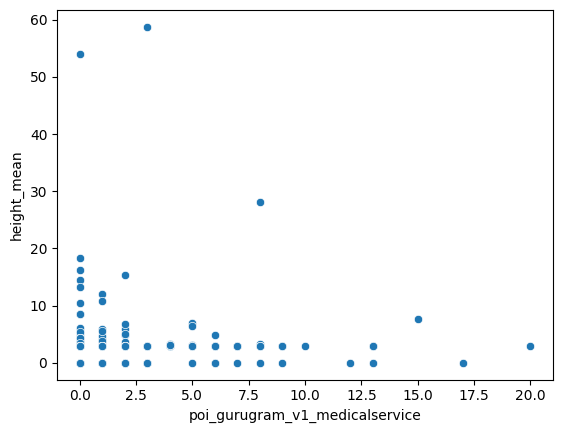

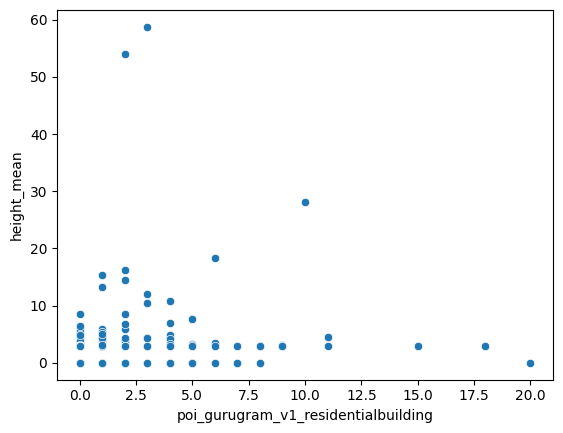

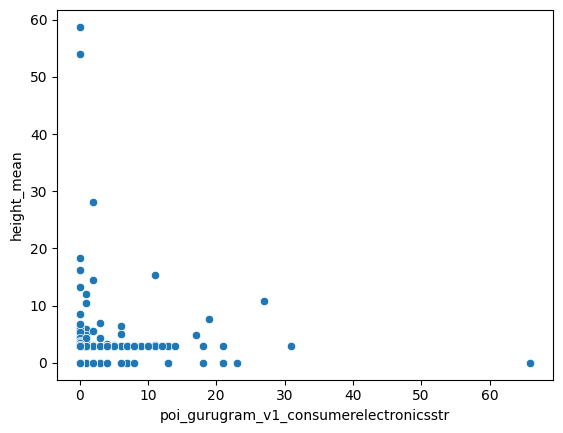

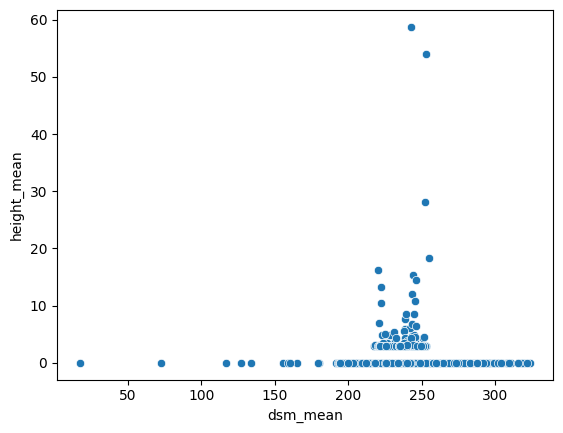

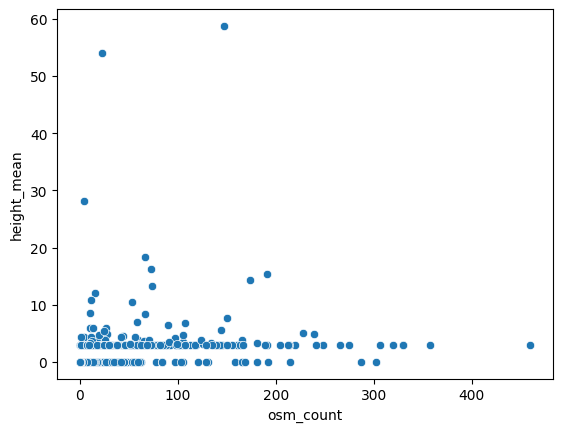

In [77]:
for i in df_test.columns[:-1]:
    plt.figure()
    sns.scatterplot(x=df_test[i],y=df_test["height_mean"])

In [76]:
df_test.isnull().sum()

lulc_Vegetation                           0
lulc_Barren                               0
lulc_Builtup                              0
albedo_mean                               0
ndvi_mean                                 0
ndbi_mean                                 0
gaia_mean                                 0
ntl_mean                                  0
s1vh_mean                                 0
s1vv_mean                                 0
pop_sum                                   0
poi_gurugram_v1_businessfacility          0
poi_gurugram_v1_restaurant                0
poi_gurugram_v1_nightlife                 0
poi_gurugram_v1_shopping                  0
poi_gurugram_v1_hotel                     0
poi_gurugram_v1_cinema                    0
poi_gurugram_v1_sportscomplex             0
poi_gurugram_v1_sportscentre              0
poi_gurugram_v1_hospital                  0
poi_gurugram_v1_school                    0
poi_gurugram_v1_conveniencestr            0
poi_gurugram_v1_clothingstr     

In [213]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
X=df_test.iloc[:,:-1]
VIF=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [214]:
X=pd.DataFrame({"columns_name":df_test.columns[:-1],"VIF":VIF})
X

columns_name         VIF
0                          lulc_Vegetation  307.980375
1                              lulc_Barren    1.136940
2                             lulc_Builtup  146.454037
3                              albedo_mean 1220.776773
4                                ndvi_mean  132.844472
5                                ndbi_mean   18.131499
6                                gaia_mean   10.997837
7                                 ntl_mean    7.867752
8                                s1vh_mean  547.514291
9                                s1vv_mean  186.497111
10                                 pop_sum    8.910321
11        poi_gurugram_v1_businessfacility    1.895844
12              poi_gurugram_v1_restaurant    3.057038
13               poi_gurugram_v1_nightlife    1.466287
14                poi_gurugram_v1_shopping    4.895114
15                   poi_gurugram_v1_hotel    1.360797
16                  poi_gurugram_v1_cinema    1.673919
17           poi_gurugram_v1_sportscomplex    1.148801
18            poi_gurugram_v1_sportscentre    2.411868
19                poi_gurugram_v1_hospital    1.245797
20                  poi_gurugram_v1_school    2.021067
21          poi_gurugram_v1_conveniencestr    2.071409
22             poi_gurugram_v1_clothingstr    7.453460
23        poi_gurugram_v1_sportinggoodsstr    2.459552
24          poi_gurugram_v1_medicalservice    3.445786
25     poi_gurugram_v1_residentialbuilding    1.442972
26  poi_gurugram_v1_consumerelectronicsstr    6.142533
27                                dsm_mean  124.597586
28                               osm_count    2.789083

In [217]:
df_test_1=df_test.drop(columns=["ndvi_mean","albedo_mean","lulc_Builtup","lulc_Vegetation","s1vh_mean","gaia_mean","s1vv_mean",
                                "poi_gurugram_v1_nightlife","poi_gurugram_v1_hotel","poi_gurugram_v1_sportinggoodsstr",
                                "poi_gurugram_v1_consumerelectronicsstr","lulc_Builtup","lulc_Barren"])

In [224]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
X=df_test_1.iloc[:,:-1]
VIF=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [225]:
X=pd.DataFrame({"columns_name":X.columns,"VIF":VIF})
X

columns_name      VIF
0                             ndbi_mean 4.275040
1                              ntl_mean 5.242549
2                               pop_sum 4.096314
3      poi_gurugram_v1_businessfacility 1.565450
4            poi_gurugram_v1_restaurant 2.659436
5              poi_gurugram_v1_shopping 4.865137
6                poi_gurugram_v1_cinema 1.601559
7         poi_gurugram_v1_sportscomplex 1.122038
8          poi_gurugram_v1_sportscentre 2.259905
9              poi_gurugram_v1_hospital 1.161021
10               poi_gurugram_v1_school 1.952744
11       poi_gurugram_v1_conveniencestr 1.966213
12          poi_gurugram_v1_clothingstr 4.229686
13       poi_gurugram_v1_medicalservice 2.179118
14  poi_gurugram_v1_residentialbuilding 1.402310
15                             dsm_mean 6.768683
16                            osm_count 2.339396

<h1><center>Model Building<center></h1>

# RandomForest

In [237]:
col=["ndbi_mean",'ntl_mean',"pop_sum","poi_gurugram_v1_businessfacility","poi_gurugram_v1_restaurant","poi_gurugram_v1_cinema",
     "poi_gurugram_v1_sportscentre","poi_gurugram_v1_school",
    "poi_gurugram_v1_clothingstr","poi_gurugram_v1_medicalservice",
     "poi_gurugram_v1_residentialbuilding","osm_count"]

x=df_test_1[col]
y=df_test_1.iloc[:,-1]


In [238]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [239]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [240]:
from sklearn.ensemble import RandomForestRegressor
model_rf=RandomForestRegressor()
model_rf.fit(x_train,y_train)

RandomForestRegressor()

In [241]:
y_predict_train=model_rf.predict(x_train)
y_predict_test=model_rf.predict(x_test)

In [242]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('mean Absolute error_of_train: ', metrics.mean_absolute_error(y_train,y_predict_train))
print('mean Absolute error_of_test: ', metrics.mean_absolute_error(y_test,y_predict_test))
print('mean squared error_of_train: ', metrics.mean_squared_error(y_train,y_predict_train))
print('mean squared error_of_test: ' , metrics.mean_squared_error(y_test,y_predict_test))
print('root mean Absolute error_of_train: ', np.sqrt(metrics.mean_squared_error(y_train,y_predict_train)))
print('root mean Absolute error_of_test: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))
print("r2_on_train: ", r2_score(y_train,y_predict_train))
print("r2_on_test:  ", r2_score(y_test,y_predict_test))
n = X.shape[0]
p = X.shape[1]
r2_train=r2_score(y_train,y_predict_train)
r2_test=r2_score(y_test,y_predict_test)                
adjusted_r2_train = 1 - (1 - r2_train) * (n - 1) / (n - p - 1)
adjusted_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - p - 1)
print("adjust_r2_train:",adjusted_r2_train)
print("adjusted_r2_test:",adjusted_r2_test)

mean Absolute error_of_train:  0.19773903687174138
mean Absolute error_of_test:  0.4581181729166667
mean squared error_of_train:  1.262820125726581
mean squared error_of_test:  2.2344589730945126
root mean Absolute error_of_train:  1.1237526977616477
root mean Absolute error_of_test:  1.4948106813555062
r2_on_train:  0.872056673309255
r2_on_test:   0.4145439278662988
adjust_r2_train: 0.8537790552105771
adjusted_r2_test: 0.33090734613291295


### Lasso

In [177]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV

In [178]:
model_la= Lasso()
alpha_values = [0.01, 0.1, 1,4, 5,8,10]
model = Lasso()
grid_search = GridSearchCV(model, {'alpha': alpha_values}, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 4, 5, 8, 10]})

In [179]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 1}
0.19769099290461115


In [180]:
model_la = Lasso(0.01)
model_la.fit(x_train, y_train)

Lasso(alpha=0.01)

In [181]:
y_predict_train=model_la.predict(x_train)
y_predict_test=model_la.predict(x_test)

In [182]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('mean Absolute error_of_train: ', metrics.mean_absolute_error(y_train,y_predict_train))
print('mean Absolute error_of_test: ', metrics.mean_absolute_error(y_test,y_predict_test))
print('mean squared error_of_train: ', metrics.mean_squared_error(y_train,y_predict_train))
print('mean squared error_of_test: ' , metrics.mean_squared_error(y_test,y_predict_test))
print('root mean Absolute error_of_train: ', np.sqrt(metrics.mean_squared_error(y_train,y_predict_train)))
print('root mean Absolute error_of_test: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))
print("r2_on_train: ", r2_score(y_train,y_predict_train))
print("r2_on_test:  ", r2_score(y_test,y_predict_test))
n = X.shape[0]
p = X.shape[1]
r2_train=r2_score(y_train,y_predict_train)
r2_test=r2_score(y_test,y_predict_test)                
adjusted_r2_train = 1 - (1 - r2_train) * (n - 1) / (n - p - 1)
adjusted_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - p - 1)
print("adjust_r2_train:",adjusted_r2_train)
print("adjusted_r2_test:",adjusted_r2_test)

mean Absolute error_of_train:  0.7332623964083919
mean Absolute error_of_test:  0.7083199477074608
mean squared error_of_train:  6.768440829093231
mean squared error_of_test:  2.352078003514947
root mean Absolute error_of_train:  2.6016227299693613
root mean Absolute error_of_test:  1.5336485919254603
r2_on_train:  0.31425163525533684
r2_on_test:   0.3837262774250574
adjust_r2_train: 0.21628758314895635
adjusted_r2_test: 0.29568717420006563


### Find Best fit parameter for Random Forest  By RandomizedSearchCV

In [183]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_depth=[int(x) for x in np.linspace(start=10,stop=110,num=11)]
max_depth.append(None)
max_features=["auto","sqrt"]
min_samples_split=[2,4,6,8,10]
min_samples_leaf=[1,2,3,4]
bootstrap=[True,False]
random_grid={'n_estimators': n_estimators , 'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,
            'bootstrap':bootstrap}
rf=RandomForestRegressor(random_state=42)

rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,
                               scoring="neg_mean_absolute_error",cv=3,verbose=2,random_state=42,
                               n_jobs=-1,return_train_score=True)
rf2=rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [184]:
print("best parameter",rf2.best_params_)

best parameter {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [185]:
from sklearn.ensemble import RandomForestRegressor
model_r_b=RandomForestRegressor(n_estimators=800,min_samples_split = 10,min_samples_leaf=4,max_features='sqrt',max_depth=None,bootstrap=False,random_state=42)

In [186]:
model_r_b.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800, random_state=42)

In [187]:
y_predict_train=model_r_b.predict(x_train)
y_predict_test=model_r_b.predict(x_test)
#y_predict_test

In [188]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('mean Absolute error_of_train: ', metrics.mean_absolute_error(y_train,y_predict_train))
print('mean Absolute error_of_test: ', metrics.mean_absolute_error(y_test,y_predict_test))
print('mean squared error_of_train: ', metrics.mean_squared_error(y_train,y_predict_train))
print('mean squared error_of_test: ' , metrics.mean_squared_error(y_test,y_predict_test))
print('root mean Absolute error_of_train: ', np.sqrt(metrics.mean_squared_error(y_train,y_predict_train)))
print('root mean Absolute error_of_test: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))
print("r2_on_train: ", r2_score(y_train,y_predict_train))
print("r2_on_test:  ", r2_score(y_test,y_predict_test))
n = X.shape[0]
p = X.shape[1]
r2_train=r2_score(y_train,y_predict_train)
r2_test=r2_score(y_test,y_predict_test)                
adjusted_r2_train = 1 - (1 - r2_train) * (n - 1) / (n - p - 1)
adjusted_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - p - 1)
print("adjust_r2_train:",adjusted_r2_train)
print("adjusted_r2_test:",adjusted_r2_test)

mean Absolute error_of_train:  0.3185906547995249
mean Absolute error_of_test:  0.4582841300392317
mean squared error_of_train:  3.4837633975045694
mean squared error_of_test:  1.8214004345551245
root mean Absolute error_of_train:  1.8664842344645105
root mean Absolute error_of_test:  1.3495926920945907
r2_on_train:  0.6470405646855417
r2_on_test:   0.5227704079433302
adjust_r2_train: 0.5966177882120477
adjusted_r2_test: 0.45459475193523446


In [149]:
pd.set_option("display.max_rows",240)
com_org_vs_pre=pd.DataFrame({"Original_height":y_test,"Predicted_height":y_predict_test})
com_org_vs_pre.reset_index(drop=True,inplace=True)
com_org_vs_pre

Original_height  Predicted_height
0           0.000000          0.002765
1           0.000000          0.002355
2           0.000000          0.002665
3           0.000000          2.498203
4           0.000000          0.001680
5           3.000000          2.898055
6           0.000000          1.322108
7           0.000000          0.001735
8           3.000000          2.367417
9           0.000000          2.765693
10          0.000000          0.002092
11          0.000000          2.078870
12          0.000000          0.069667
13          3.000000          2.914609
14          0.000000          5.048766
15          0.000000          0.001680
16          0.000000          1.289647
17          3.000000          3.678069
18          0.000000          1.602904
19          0.000000          0.001680
20          3.000000          1.980162
21          0.000000          0.002067
22          0.000000          0.002342
23          0.000000          0.001680
24          0.000000          0.001827
25          4.875502          5.002542
26          0.000000          0.002214
27          0.000000          0.002595
28          0.000000          0.001680
29          0.000000          0.001680
30          0.000000          0.001680
31          0.000000          0.004333
32          3.000000          2.621482
33          0.000000          0.002355
34          0.000000          0.002342
35          3.000000          2.275611
36          0.000000          0.001680
37          0.000000          0.001680
38          0.000000          0.001827
39          0.000000          0.002482
40          0.000000          0.001680
41          0.000000          0.050259
42          0.000000          0.001827
43          0.000000          0.001735
44          0.000000          0.001735
45          0.000000          0.001680
46          0.000000          0.001680
47          3.131579          2.605070
48          3.000000          8.329128
49          0.000000          0.792367
50          0.000000          0.014513
51          3.000000          3.220149
52          0.000000          0.025820
53          0.000000          0.001680
54          0.000000          0.136370
55          0.000000          0.062493
56          0.000000          0.049238
57          0.000000          2.705543
58          0.000000          0.003702
59          0.000000          0.002342
60          0.000000          0.001680
61          0.000000          0.002502
62          0.000000          0.075094
63          0.000000          0.001680
64          0.000000          0.004357
65          0.000000          0.003967
66          3.000000          5.193730
67          0.000000          0.005231
68          0.000000          0.001680
69          0.000000          0.001680
70          0.000000          0.001680
71          0.000000          0.002004
72          0.000000          0.001680
73          0.000000          0.002092
74          0.000000          0.001680
75          0.000000          0.001735
76          0.000000          0.001680
77          0.000000          0.001680
78          0.000000          0.002345
79          0.000000          0.001680
80          0.000000          0.001827
81          0.000000          0.001680
82          0.000000          0.707949
83          0.000000          0.468277
84          0.000000          0.001680
85          0.000000          0.001827
86          0.000000          0.003252
87          0.000000          0.002595
88          0.000000          0.001680
89          3.000000          1.764952
90          0.000000          0.002342
91          3.000000          3.572768
92          3.000000          3.073004
93          0.000000          0.002355
94          0.000000          0.004220
95          0.000000          0.001680
96          0.000000          0.001680
97          0.000000          0.002004
98          3.000000          2.751955
99          0.000000          0.001680
100         0.000000          0.031601
101         0.000000       

### Comparision btw Original_height vs Predicted height 

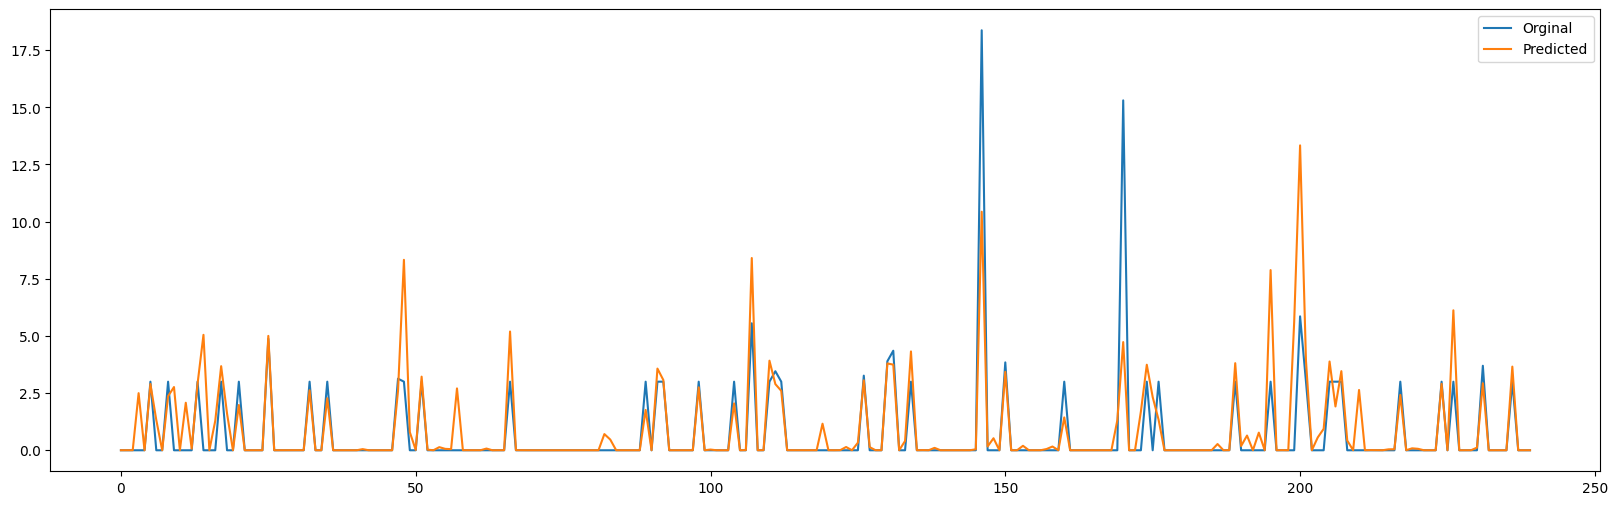

In [150]:
plt.figure(figsize=(20,6))
com_org_vs_pre["Original_height"].plot(label="Orginal")
com_org_vs_pre["Predicted_height"].plot(label="Predicted")
plt.legend()
plt.show()

### Features's Importance

In [236]:
x

array([1, 2, 3, 4, 5, 8, 0, 0, 0, 0])

In [243]:
pd.set_option("display.float_format",lambda x:"%.6f"%x)
values=model_r_b.feature_importances_
pd.DataFrame({"columns_name":x.columns,"feature_importances":values})

columns_name  feature_importances
0                             ndbi_mean             0.056662
1                              ntl_mean             0.307903
2                               pop_sum             0.080321
3      poi_gurugram_v1_businessfacility             0.068789
4            poi_gurugram_v1_restaurant             0.153659
5                poi_gurugram_v1_cinema             0.000127
6          poi_gurugram_v1_sportscentre             0.013860
7                poi_gurugram_v1_school             0.005516
8           poi_gurugram_v1_clothingstr             0.029694
9        poi_gurugram_v1_medicalservice             0.015533
10  poi_gurugram_v1_residentialbuilding             0.127230
11                            osm_count             0.140707

In [198]:
x=np.array([1,2,3,4,5,8,0,0,0,0])
y=np.array([1,2,6,4,2,2,0,0,0,0])

In [199]:
print("r2_on_train: ", r2_score(x,y))
n = X.shape[0]
p = X.shape[1]
r2_=r2_score(x,y)
             
adjusted_r2_ = 1 - (1 - r2_) * (n - 1) / (n - p - 1)
print("adjust_r2_:",adjusted_r2_)

r2_on_train:  0.18305597579425104
adjust_r2_: 0.06634968662200114


In [190]:
com_org_vs_pre=pd.DataFrame({"Original_height":x,"Predicted_height":y})
com_org_vs_pre.reset_index(drop=True,inplace=True)
com_org_vs_pre

Original_height  Predicted_height
0                1                 1
1                2                 2
2                3                 6
3                4                 4

In [255]:
# finding best fit line which have lowest mse by changing m and b value in y=mx+b
def gradient_descent(x,y):
    m=0
    b=0
    iteration=1000
    learning_rate=0.005
    for i in range(iteration):
        y_pred=m*x +b 
        print(y_pred)
        mse=sum((y-y_pred)**2)
        print(mse)
        md= (-2/len(x))*sum(x*(y-y_pred))
        print(md)
        bd=(-2/len(x))*(y-y_pred)
        print(bd)
        m=m-learning_rate*md
        print(m)
        b=b-learning_rate*bd
        print(b)
        print(mse)
        print("///")
        
    pass

    

In [189]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([5,7,9,11,13])
gradient_descent(x,y)

NameError: name 'gradient_descent' is not defined

In [30]:
m=1
b=0
y_pred=m*x +b 

In [31]:
y_pred

array([1, 2, 3, 4, 5])

In [32]:
(y-y_pred)

array([4, 5, 6, 7, 8])

In [33]:
sum((y-y_pred)**2)

190

In [35]:
(-2/len(x))*sum(x*(y-y_pred))

-40.0